_Máster Universitario en Inteligencia de Negocio_

_Inteligencia de Cliente CRM_



# Actividad 01: Análisis descriptivo de los datos (EDA) de un CRM

En esta actividad llevaremos a cabo un análisis descriptivo de los datos provenientes del CRM de la empresa GoodTasteMarket.

GoodTasteMarket es una red de supermercados estadounidense con una amplia presencia en el norte de Europa cuya línea de negocio está centrada en productos de alimentación. Con el objetivo de redefinir sus estrategias comerciales y lanzar nuevas campañas de marketing, GoodTasteMarket pone en marcha un proyecto de análisis de los datos procedentes de su CRM a fin de obtener un conocimiento útil sobre el comportamiento de sus clientes y tomar decisiones informadas en el ámbito del marketing mix.

Para llevar a cabo este análisis disponemos de un conjunto de datos en formato .csv denominado **marketing_campaign.csv** con la siguiente descripción:

## Descripción del dataset:

- **ID**: Identificador único del cliente
- **Age**: Edad del cliente
- **Education**: Nivel educativo del cliente
0 - 'Basica'
1 - 'Secundaria'
2 - 'Grado'
3 - 'Master'
4 - 'Doctorado - PhD'

- **Marital_Status**: Estado civil del cliente
0 - 'Soltero/a'
1 - 'Pareja de hecho'
2 - 'Casado/a'
3 - 'Divorciado/a'
4 - 'Viudo/a'

- **Income**: Ingresos familiares anuales del cliente
- **Children**: Número de niños en el hogar del cliente
- **Seniority**: Antigüedad del cliente en la empresa
- **Recency**: Número de días transcurridos desde la última compra del cliente
- **Complain**: Quejas del cliente en los últimos 2 años (1 - si ha realizado alguna, 0 - si no ha realizado ninguna)
- **MntWines**: Cantidad gastada en vino en los últimos 2 años
- **MntFruits**: Cantidad gastada en fruta en los últimos 2 años
- **MntMeatProducts**: Cantidad gastada en carne en los últimos 2 años
- **MntFishProducts**: Cantidad gastada en pescado en los últimos 2 años
- **MntSweetProducts**: Cantidad gastada en dulces en los últimos 2 años
- **MntGoldProds**: Cantidad gastada en productos premium en los últimos 2 años
- **MntTotalSpent**: Cantidad total gastada en cualquier producto
- **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa
- **NumCatalogPurchases**: Número de compras realizadas a través de catálogo
- **NumStorePurchases**: Número de compras realizadas a través de tiendas físicas
- **NumTotalPurchases**: Número total de compras realizadas por cualquier canal
- **NumWebVisitsMonth**: Número de visitas al sitio web de la empresa en el último mes

### Paso 1. Importamos las librerías y cargamos el dataset

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Cargamos el dataset en Colab
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


###Paso 2: Describimos la estructura de los datos y sus principales estadísticas

In [4]:
# Leemos el dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']), sep=',')
data.head(10)

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
0,5524,58138.0,58,635,88,546,172,88,88,8,...,4,7,0,2,0,0,1617,66,22,3
1,2174,46344.0,38,11,1,6,2,1,6,1,...,2,5,0,2,0,2,27,69,4,1
2,4141,71613.0,26,426,49,127,111,21,42,8,...,10,4,0,2,1,0,776,58,20,2
3,6182,26646.0,26,11,4,20,10,3,5,2,...,4,6,0,2,1,1,53,39,6,1
4,5324,58293.0,94,173,43,118,46,27,15,5,...,6,5,0,4,2,1,422,42,14,1
5,7446,62513.0,16,520,42,98,0,42,14,6,...,10,6,0,3,1,1,716,56,20,2
6,965,55635.0,34,235,65,164,50,49,27,7,...,7,6,0,2,3,1,590,52,17,3
7,6177,33454.0,32,76,10,56,3,1,23,4,...,4,8,0,4,2,1,169,38,8,2
8,4855,30351.0,19,14,0,24,3,3,2,3,...,2,9,0,4,1,1,46,49,5,2
9,5899,5648.0,68,28,0,6,1,1,13,1,...,0,20,0,4,1,2,49,73,1,1


In [ ]:
# Vemos el número de variables e instancias que tiene el dataset
data.shape

(2240, 21)

**1**. ¿Cuántas variables tiene el dataset?





**Respuesta:**
- Cuenta con un total de 21 variables

**2**. ¿Cuántas instancias tiene el dataset?

**Respuesta:**
- Un total de 2240 instancias

In [ ]:
# Comprobamos la existencia de filas duplicadas
data.duplicated().sum()

np.int64(0)

In [ ]:
# Generamos estadísticas descriptivas  de los datos
def formato_europeo_mejorado(x):
    try:
        if x == int(x):
            return f"{int(x):,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
        else:
            return f"{x:,.4f}".replace(",", "X").replace(".", ",").replace("X", ".")
    except:
        return x

descripcion_formateada = data.describe().map(formato_europeo_mejorado)

# Mostrar resultado
descripcion_formateada

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
count,2.240,2.216,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,...,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240
mean,"5.592,1598","52.247,2514","49,1094","303,9357","26,3022","166,9500","37,5254","27,0629","44,0219","4,0848",...,"5,7902","5,3165","0,0094","2,4603","1,4804","0,9504","605,7982","54,1942","12,5371","1,9719"
std,"3.246,6622","25.173,0767","28,9625","336,5974","39,7734","225,7154","54,6290","41,2805","52,1674","2,7787",...,"3,2510","2,4266","0,0964","1,0043","1,0472","0,7518","602,2493","11,9841","7,2057","0,6846"
min,0,1.730,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,27,0,1
25%,"2.828,2500",35.303,24,"23,7500",1,16,3,1,9,2,...,3,3,0,2,1,0,"68,7500",46,6,2
50%,"5.458,5000","51.381,5000",49,"173,5000",8,67,12,8,24,4,...,5,6,0,2,2,1,396,53,12,2
75%,"8.427,7500",68.522,74,"504,2500",33,232,50,33,56,6,...,8,7,0,3,2,1,"1.045,5000",64,18,2
max,11.191,666.666,99,1.493,199,1.725,259,263,362,27,...,13,20,1,4,4,3,2.525,130,32,3


**3**. Analizad en términos generales la distribución de los datos. Para llevar a cabo este análisis podéis haceros preguntas como: ¿Existe algún dato faltante? ¿Hay alguna media que nos resulte extraña o atípica? ¿El min y max de alguna de las variables os sugiere que puedan existir outliers? ¿Hemos observado alguna variable cuya concentración de los datos, cuartiles 25%, 50%, 75%, os resulte relevante para el análisis?

**Respuesta:**
- Existe celdas vacias en "INCOME", debido a que esta arroja un total de 2216 instancias y no un total de 2240 como lo indica el total de instacia del data set

- Existe medias atipicas: En income, el valor de la media y la mediana (50%) es similiar sin embargo, se observa que el valor maximo es 3 veces superior al tercer cuartil, por lo que pueden existir datos atipicos que aumenten la media.

  Para los casos, asimismo se observa que, para los valores mnt, los valores de la media se encuentran muy sesgados hacia la derecha, llegando en algunos casos a ser el doble, por lo que, en un principio se entenderia que sus medias son atipicas no obstante, se observa que estos datos no son tan atipicos, debido a que la tendencia entre los productos (mnt) la tendencia es que exista ese sesgo hacia la derecha.

- Los valores maximos de los Mnt sugieren que existen datos atipicos, debido existe un salto pronunciado entre el cuartil del 75% a valor maximo.

- se puede indicar que la mayor cantidad de productos vendidos, cuentan con precios cercanos los valores otorgados en el cuartil del 75%, dada la relacion superficial entre la media y el valor maximo.

In [ ]:
#Generamos estadísticas de una variable concreta, la variable "Income"
def formato_europeo_mejorado(x):
    if x == int(x):
        return f"{int(x):,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    else:
        return f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Aplicar formato mejorado
(data['Income'].describe()
               .apply(formato_europeo_mejorado)
               .to_frame('Ingresos (€)')
               .style
               .set_properties(**{'text-align': 'right'})
               .format(None, thousands=".", decimal=","))

,Ingresos (€)
count,2.216
mean,"52.247,25"
std,"25.173,08"
min,1.730
25%,35.303
50%,"51.381,50"
75%,68.522
max,666.666


**4**. Analizad los principales estadísticos de la variable **"Income"**: mean, std, min, cuartiles 25%, 50% 75% y max. Para llevar a cabo este análisis podéis responder a preguntas como :¿La media de ingresos es más/menos elevada? ¿Cuál es el rango de ingresos en el que se encuentra el 50% de los clientes?

**Respuesta**:
- La media de ingresos es un poco mas elevada, esto se logra, debido a la comparacion con la mediana (cuartil del 50%). Ya que un poco mas de esta poblacion recibe un salario medio del 52.247,25

- el rango de ingresos va desde Q1 hasta Q2, traducido a 35.303 a 68.522

In [ ]:
#Vemos qué tipo de variables contiene el dataset y qué valores no contienen nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  Complain             2240 non-null   int64  
 14  Education_Int        2240 non-null   int64  
 15  Marital_Status_Int   2240 non-null   i

**5**. ¿Cuántas variables numéricas tiene el dataset? ¿Cuántas de tipo caracter o string?

**Respuesta** :

- Existen un total de 21 variables numericas, las cuales 20 son de numero entero (int64) y 1 es de tipo decimal (float)

**6**. ¿Existen valores nulos en el dataset? ¿Si es así, en qué variables?

**Respuesta:**

- Existen valores nulos en Income, debido a que arroja un total de 2216 valores no nulos de los 2240 valores totales que hay

In [ ]:
#Elegimos la variable "Complain" para ver los distintos valores que adopta y saber qué tipo de variable es
print('Complain: ',data['Complain'].unique())

Complain:  [0 1]


**7**. ¿Pensáis que la variable "Complain" es una variable categórica? Justificad vuestra respuesta.

**Respuesta:**

- Si, debido a que solo existen dos valores en la columna, valores de 0 y 1. por lo que es una varibale categorica binaria

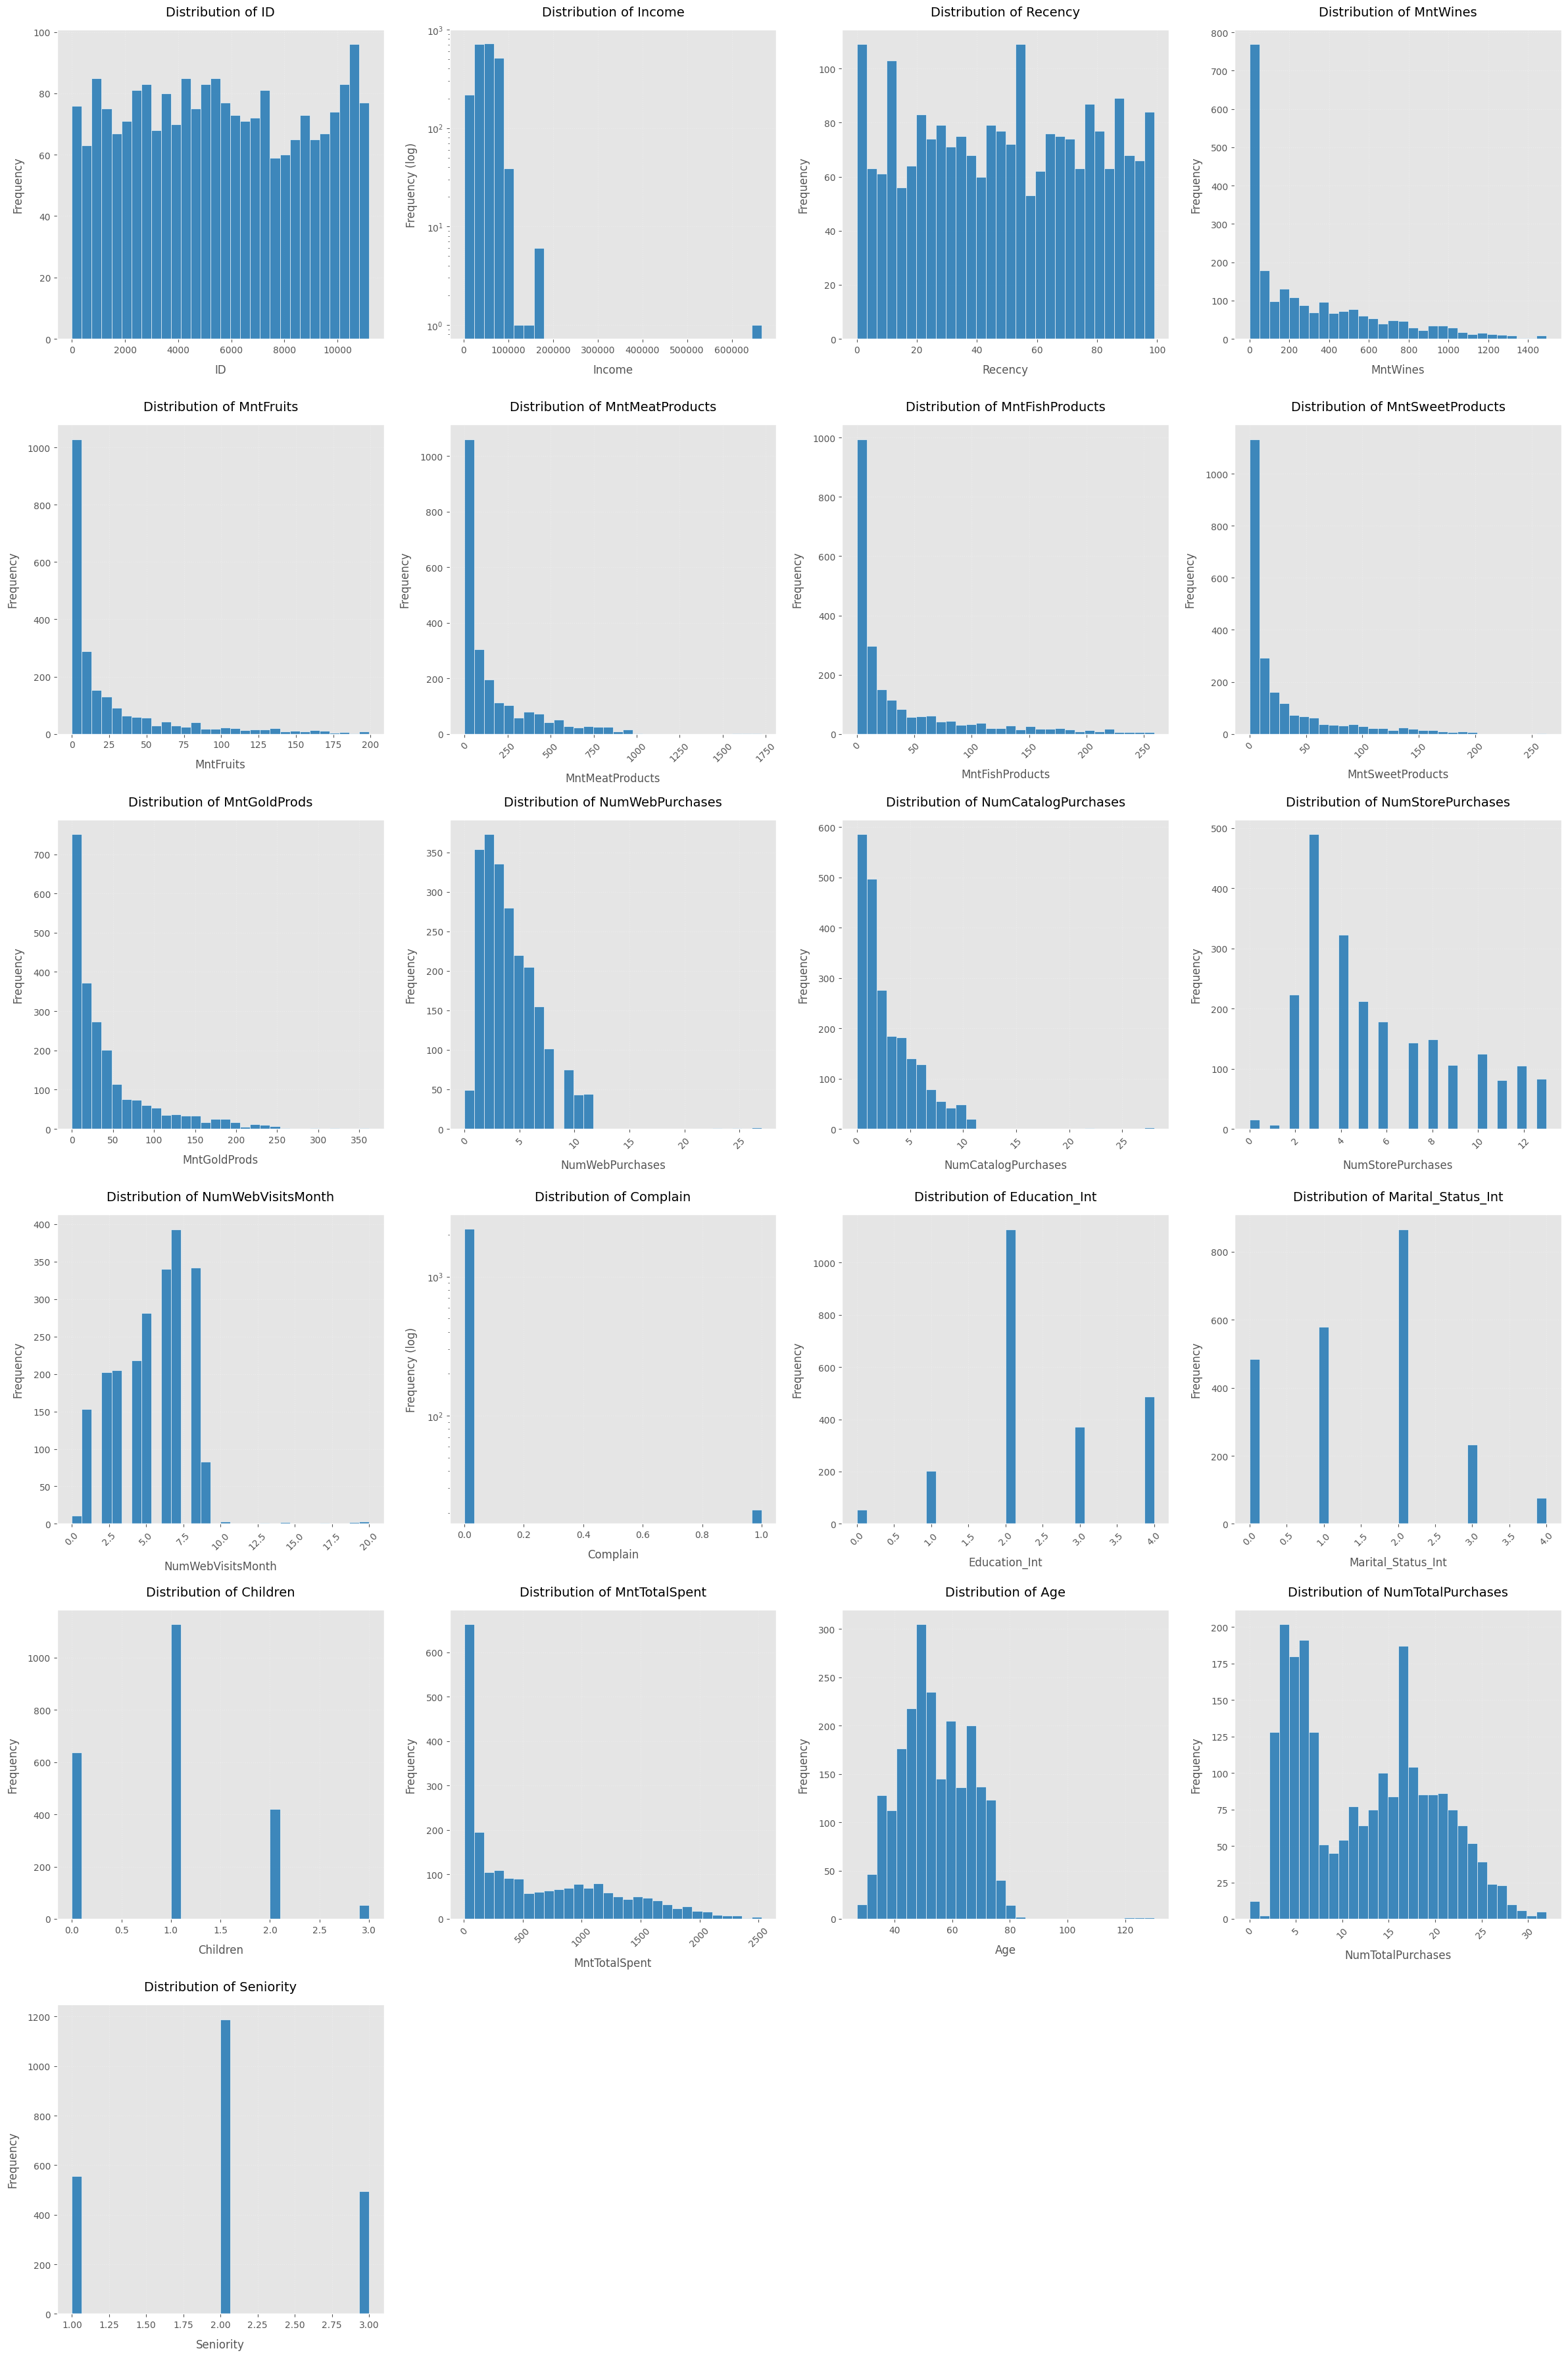

In [ ]:
#Visualizamos los histogramas de las variables numéricas para conocer su distribución
import matplotlib.pyplot as plt
import pandas as pd

# Configuración de estilo
plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.facecolor': 'white'
})

# Configuración de la figura
numeric_cols = data.select_dtypes(include=['number']).columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6*n_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Generar histogramas (usando directamente los nombres de columnas)
for i, col in enumerate(numeric_cols):
    ax = axes.flatten()[i]

    data[col].hist(
        bins=30,
        ax=ax,
        color='#1f77b4',
        edgecolor='white',
        alpha=0.85
    )

    # Usamos el nombre de la columna directamente
    ax.set_xlabel(col, labelpad=10)
    ax.set_ylabel('Frequency', labelpad=10)
    ax.set_title(f'Distribution of {col}', pad=15)

    # Rotación automática para nombres largos
    ax.tick_params(axis='x', rotation=45 if len(col) > 12 else 0)
    ax.grid(True, linestyle=':', alpha=0.3)

    # Escala logarítmica para datos sesgados
    if data[col].skew() > 3:
        ax.set_yscale('log')
        ax.set_ylabel('Frequency (log)', labelpad=10)

# Ocultar ejes vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

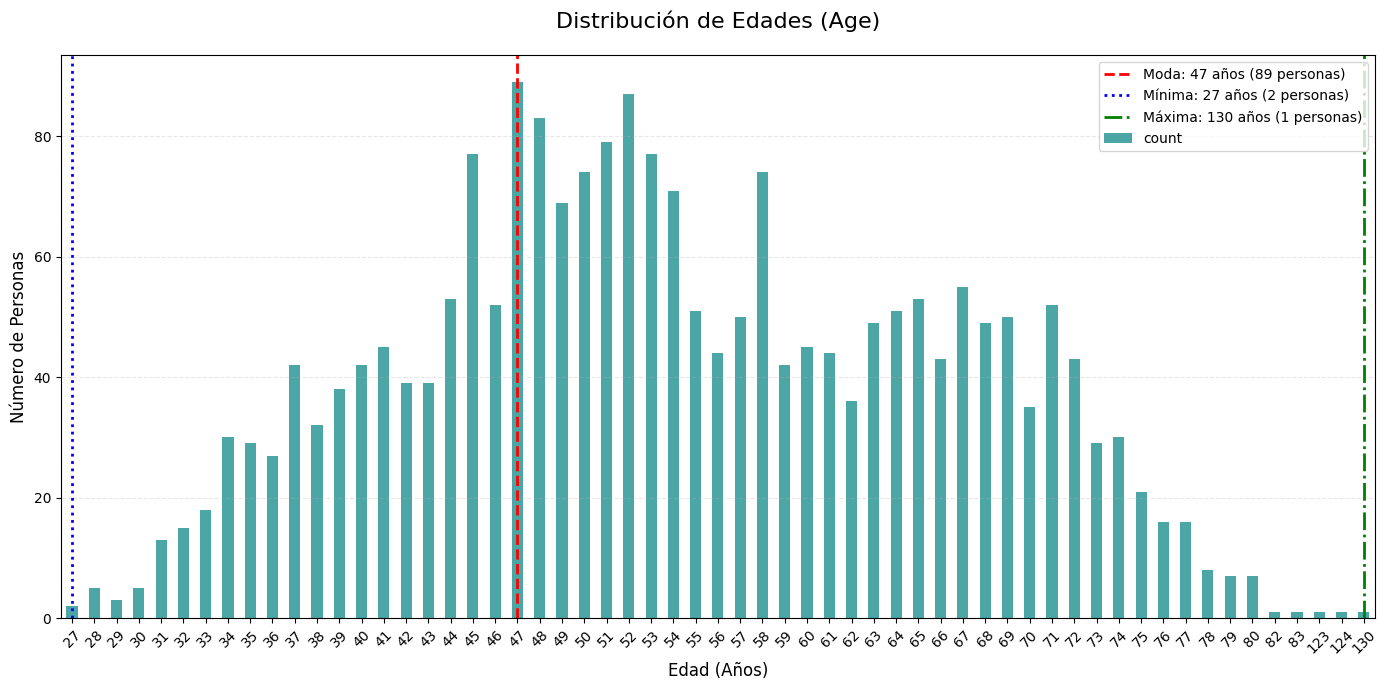

In [ ]:
#Visualizamos el histograma de la variable Age

# --- 1. Calcular la edad que más se repite (moda) y su frecuencia ---
edad_predominante = data['Age'].mode()[0]
frecuencia_predominante = data['Age'].value_counts().loc[edad_predominante]



edad_minima = data['Age'].min()
frecuencia_minima = data['Age'].value_counts().loc[edad_minima]

edad_maxima = data['Age'].max()
frecuencia_maxima = data['Age'].value_counts().loc[edad_maxima]



# --- 4. Visualización interactiva ---
plt.figure(figsize=(14, 7))

# Gráfico de barras
frecuencia_edades.plot(kind='bar', color='teal', alpha=0.7)

# Líneas de referencia
plt.axvline(
    x=frecuencia_edades.index.get_loc(edad_predominante),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Moda: {edad_predominante} años ({frecuencia_predominante} personas)'
)

plt.axvline(
    x=frecuencia_edades.index.get_loc(edad_minima),
    color='blue',
    linestyle=':',
    linewidth=2,
    label=f'Mínima: {edad_minima} años ({frecuencia_minima} personas)'
)

plt.axvline(
    x=frecuencia_edades.index.get_loc(edad_maxima),
    color='green',
    linestyle='-.',
    linewidth=2,
    label=f'Máxima: {edad_maxima} años ({frecuencia_maxima} personas)'
)

# Personalización
plt.title('Distribución de Edades (Age)', fontsize=16, pad=20)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#Codigo usado para saber cual es la edad predominante

 **8**.  Analizad la visualización del histograma. Podéis apoyaros en preguntas como ¿Qué edad predomina entre los clientes? ¿Cual es la edad de los clientes más jóvenes? ¿Y la de los más mayores? ¿Existe algún dato anómalo que pueda desvirtuar el análisis?

**Respuesta**:

- La edad de 47 años es la que mas predomina, con un total de 89 personas

- La edad mas joven es de 27 años con un total de 2 registros

- La edad mas vieja es de 130 años un registros.

- Se evidencia un salto de la de 83 años a 123, 124 y 130 años, por lo que, podria considerarse como dato anomalo.

**9**. Escribid el código necesario para visualizar el histograma de la variable "MntWines".


🔹 Valor MntWine que más predomina: 2 euros con (Frecuencia: 42 personas)


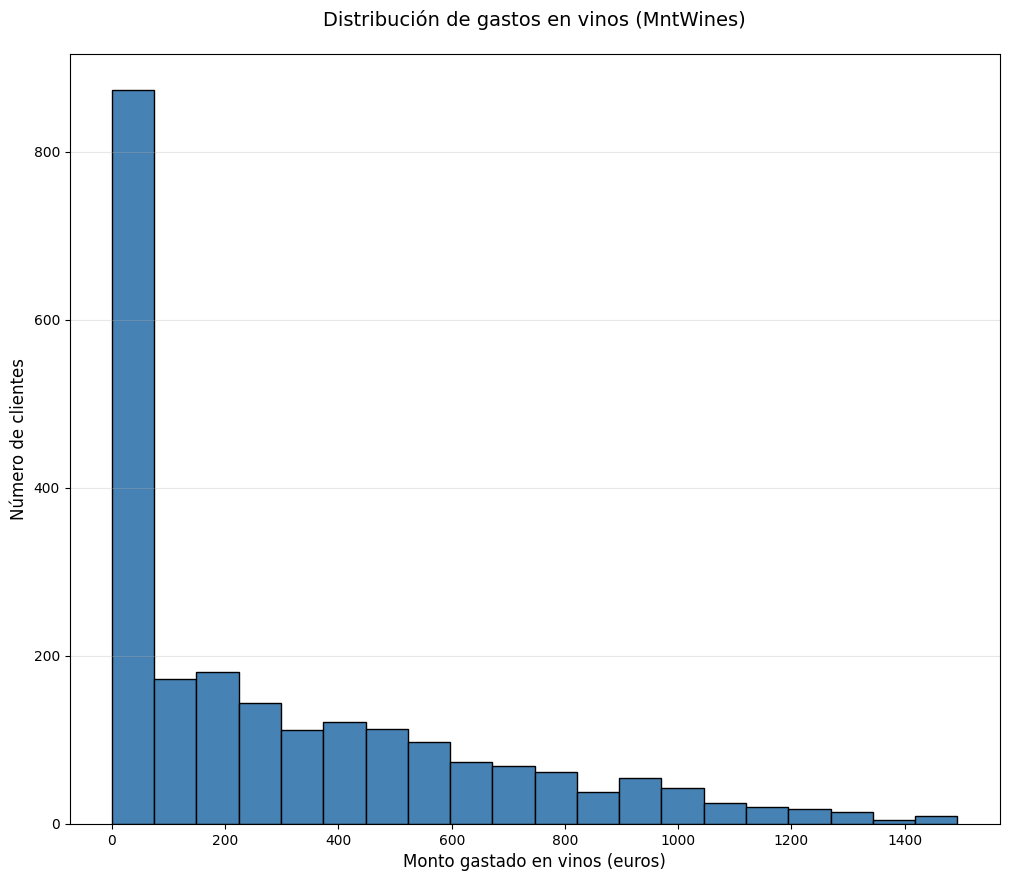

In [ ]:
# Dibujamos el histograma de la variable "MNWines"

# --- 1. Calcular el valor que más se repite (moda) y su frecuencia ---
valor_predominante_wine = data['MntWines'].mode()[0]
frecuencia_predominante_wine = data['MntWines'].value_counts().loc[valor_predominante_wine]

print(f"🔹 Valor MntWine que más predomina: {valor_predominante_wine} euros con (Frecuencia: {frecuencia_predominante_wine} personas)")

plt.figure(figsize=(12, 10))
plt.hist(data['MntWines'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Monto gastado en vinos (euros)', fontsize=12)  # Etiqueta eje X
plt.ylabel('Número de clientes', fontsize=12)  # Etiqueta eje Y
plt.title('Distribución de gastos en vinos (MntWines)', fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.show()

 **10**. ¿Que nos dice el histograma sobre la distribución de esta variable?

**Respuesta:**

- Mas de 800 peronas gastan menos de 100 euros y una gran parte del publico gastan menos de 200.

- Si se toma encuenta la descripcion estadistica de los datos, tambien es posible evidenciar que a pesar que su media sea de 303, mediante el histograma se puede validar visualmente que este dato no es representativo, dado que existen valores altos que distorcionan esta medida.


###Paso 3: Realizamos la limpieza de datos: Identificación de valores nulos e imputación de valores faltantes

In [5]:
#Visualizamos el total de valores nulos de las variables del dataset
data.isnull().sum()

,0
ID,0
Income,24
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumWebPurchases,0


**11**. ¿Qué variables contienen valores nulos y qúé número de valores nulos?

**Respuesta:**

- La variable de income presenta un total de 24 valores nulos

**12**. ¿Qué estrategias podemos llevar a cabo para hacer frente a la existencia de valores nulos o faltantes en una variable? ¿Cual de ellas elegiríais? Justificad vuestra elección.

**Respuesta:**

- Existe diferencias vias para la solvencia del inconveniente.

1. Se pueen eliminar los datos (dado que es una muetra pequeña en comparativa a la data total, los 24 datos restantes represtan solo el 1,071%

2. Otra opcionn podria ser por la regresion lineal mediante el uso y la muestra de los demas datos para el calculo del dato faltante.

- Conclusion: Como el BI asignado al proyecto, se decide elimar las 24 filas, dada que la cantidad representativa en los datos es muy baja. En caso de que los datos sean anomalos grandes, esto ayudaria a normalizar un poco mas la descripcion estadistica y en dado caso que sean datos sin ruido, su eliminacion no afectaria en gran medida el calculo ya otorgado en la descipcion estadistica.

  

In [7]:
#visualisamos la data nula de la variable Income

# Filtrar y mostrar solo las filas donde 'Income' es nulo
nulos_income = data[data['Income'].isnull()]

# Mostrar todas las columnas de esos registros (para análisis contextual)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
nulos_income

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
10,1994,NaN,11,5,5,6,0,2,1,1,0,2,7,0,2,2,1,19,40,3,2
27,5255,NaN,19,5,1,3,3,263,362,27,0,0,1,0,2,0,1,637,37,27,2
43,7281,NaN,80,81,11,50,3,2,39,1,3,4,2,0,4,0,0,186,64,8,2
48,7244,NaN,96,48,5,48,6,10,7,2,1,4,6,0,2,0,3,124,72,7,1
58,8557,NaN,57,11,3,22,2,2,6,2,0,3,6,0,2,0,1,46,41,5,2
71,10629,NaN,25,25,3,43,17,4,17,3,0,3,8,0,1,2,1,109,50,6,3
90,8996,NaN,4,230,42,192,49,37,53,7,2,8,9,0,4,2,3,603,66,17,3
91,9235,NaN,45,7,0,8,2,0,1,1,0,2,7,0,2,0,2,18,66,3,1
92,5798,NaN,87,445,37,359,98,28,18,2,4,8,1,0,3,1,0,985,50,14,2
128,8268,NaN,23,352,0,27,10,0,15,6,1,7,6,0,4,2,1,404,62,14,2


In [11]:
#Validamos si se debe eliminar la data

# Estadísticas CON nulos (excluyéndolos temporalmente)
print("📊 Estadísticas originales (con nulos):")
print(data['Income'].describe())

# Estadísticas SI ELIMINAMOS nulos
print("\n📊 Estadísticas al eliminar nulos:")
print(data['Income'].dropna().describe())

# ¿Cambia la media/mediana significativamente?
diff_media = data['Income'].mean() - data['Income'].dropna().mean()
diff_mediana = data['Income'].median() - data['Income'].dropna().median()
print(f"\n🔎 Diferencia al eliminar nulos: Media = {diff_media:.2f}, Mediana = {diff_mediana:.2f}")

📊 Estadísticas originales (con nulos):
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

📊 Estadísticas al eliminar nulos:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

🔎 Diferencia al eliminar nulos: Media = 0.00, Mediana = 0.00


**RESPUESTA:**

- En caso de que, se decida elimnar los valores nulos, esto no modificaria la estadistica descriptiva de la propia variable, si enmabargo, se debe verificar si esta eliminacion modificaria el resto de datos, por lo que se procedera con un analisis mas detallado

In [7]:
import pandas as pd
import io

# Cargar datos
data = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']), sep=',')
print("✅ Datos cargados. Filas:", len(data))

# Función para formato europeo (actualizada)
def formato_europeo(x, decimales=2):
    if isinstance(x, (int, float)):
        return f"{x:,.{decimales}f}".replace(",", "X").replace(".", ",").replace("X", ".")
    return x

# 1. Estadística descriptiva (data completa)
print("\n" + "="*80)
print("📊 ESTADÍSTICA DESCRIPTIVA (DATA COMPLETA)".center(80))
print("="*80)
desc_completa = data.describe(include='number').apply(lambda s: s.map(lambda x: formato_europeo(x)))
display(desc_completa)

# 2. Data sin nulos en 'Income'
data_sin_nulos = data.dropna(subset=['Income'])
print("\n" + "="*80)
print(f"📊 ESTADÍSTICA SIN NULOS EN 'INCOME' (ELIMINADAS {len(data)-len(data_sin_nulos)} FILAS)".center(80))
print("="*80)
desc_sin_nulos = data_sin_nulos.describe(include='number').apply(lambda s: s.map(lambda x: formato_europeo(x)))
display(desc_sin_nulos)

# 3. Cuadro comparativo (sin warnings)
print("\n" + "="*80)
print("🔍 COMPARATIVO: MODIFICACIONES".center(80))
print("="*80)

diferencias = data_sin_nulos.describe(include='number') - data.describe(include='number')
resumen = pd.DataFrame({
    'Media (Original)': data.describe(include='number').loc['mean'].map(formato_europeo),
    'Media (Sin Nulos)': data_sin_nulos.describe(include='number').loc['mean'].map(formato_europeo),
    'Diferencia Media': diferencias.loc['mean'].map(formato_europeo),
    'Mediana (Original)': data.describe(include='number').loc['50%'].map(formato_europeo),
    'Mediana (Sin Nulos)': data_sin_nulos.describe(include='number').loc['50%'].map(formato_europeo),
    'Diferencia Mediana': diferencias.loc['50%'].map(formato_europeo)
})

display(resumen)

# 4. Análisis de impacto (automático)
print("\n" + "="*80)
print("💡 IMPACTO DE ELIMINAR NULOS".center(80))
print("="*80)
for col in diferencias.columns:
    diff_mean = diferencias[col].loc['mean']
    if abs(diff_mean) > 0.05 * abs(data[col].mean()):
        print(f"⚠️ {col}: Cambio significativo → Δ = {formato_europeo(diff_mean)}")
    else:
        print(f"✅ {col}: Sin cambios relevantes")

✅ Datos cargados. Filas: 2240

                   📊 ESTADÍSTICA DESCRIPTIVA (DATA COMPLETA)                    


,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
count,"2.240,00","2.216,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00",...,"2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00","2.240,00"
mean,"5.592,16","52.247,25","49,11","303,94","26,30","166,95","37,53","27,06","44,02","4,08",...,"5,79","5,32","0,01","2,46","1,48","0,95","605,80","54,19","12,54","1,97"
std,"3.246,66","25.173,08","28,96","336,60","39,77","225,72","54,63","41,28","52,17","2,78",...,"3,25","2,43","0,10","1,00","1,05","0,75","602,25","11,98","7,21","0,68"
min,"0,00","1.730,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","5,00","27,00","0,00","1,00"
25%,"2.828,25","35.303,00","24,00","23,75","1,00","16,00","3,00","1,00","9,00","2,00",...,"3,00","3,00","0,00","2,00","1,00","0,00","68,75","46,00","6,00","2,00"
50%,"5.458,50","51.381,50","49,00","173,50","8,00","67,00","12,00","8,00","24,00","4,00",...,"5,00","6,00","0,00","2,00","2,00","1,00","396,00","53,00","12,00","2,00"
75%,"8.427,75","68.522,00","74,00","504,25","33,00","232,00","50,00","33,00","56,00","6,00",...,"8,00","7,00","0,00","3,00","2,00","1,00","1.045,50","64,00","18,00","2,00"
max,"11.191,00","666.666,00","99,00","1.493,00","199,00","1.725,00","259,00","263,00","362,00","27,00",...,"13,00","20,00","1,00","4,00","4,00","3,00","2.525,00","130,00","32,00","3,00"



           📊 ESTADÍSTICA SIN NULOS EN 'INCOME' (ELIMINADAS 24 FILAS)            


,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
count,"2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00",...,"2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00","2.216,00"
mean,"5.588,35","52.247,25","49,01","305,09","26,36","167,00","37,64","27,03","43,97","4,09",...,"5,80","5,32","0,01","2,46","1,49","0,95","607,08","54,18","12,56","1,97"
std,"3.249,38","25.173,08","28,95","337,33","39,79","224,28","54,75","41,07","51,82","2,74",...,"3,25","2,43","0,10","1,00","1,05","0,75","602,90","11,99","7,20","0,69"
min,"0,00","1.730,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","5,00","27,00","0,00","1,00"
25%,"2.814,75","35.303,00","24,00","24,00","2,00","16,00","3,00","1,00","9,00","2,00",...,"3,00","3,00","0,00","2,00","1,00","0,00","69,00","46,00","6,00","2,00"
50%,"5.458,50","51.381,50","49,00","174,50","8,00","68,00","12,00","8,00","24,50","4,00",...,"5,00","6,00","0,00","2,00","2,00","1,00","396,50","53,00","12,00","2,00"
75%,"8.421,75","68.522,00","74,00","505,00","33,00","232,25","50,00","33,00","56,00","6,00",...,"8,00","7,00","0,00","3,00","2,00","1,00","1.048,00","64,00","18,00","2,00"
max,"11.191,00","666.666,00","99,00","1.493,00","199,00","1.725,00","259,00","262,00","321,00","27,00",...,"13,00","20,00","1,00","4,00","4,00","3,00","2.525,00","130,00","32,00","3,00"



                         🔍 COMPARATIVO: MODIFICACIONES                          


,Media (Original),Media (Sin Nulos),Diferencia Media,Mediana (Original),Mediana (Sin Nulos),Diferencia Mediana
ID,"5.592,16","5.588,35","-3,81","5.458,50","5.458,50","0,00"
Income,"52.247,25","52.247,25","0,00","51.381,50","51.381,50","0,00"
Recency,"49,11","49,01","-0,10","49,00","49,00","0,00"
MntWines,"303,94","305,09","1,16","173,50","174,50","1,00"
MntFruits,"26,30","26,36","0,05","8,00","8,00","0,00"
MntMeatProducts,"166,95","167,00","0,05","67,00","68,00","1,00"
MntFishProducts,"37,53","37,64","0,11","12,00","12,00","0,00"
MntSweetProducts,"27,06","27,03","-0,03","8,00","8,00","0,00"
MntGoldProds,"44,02","43,97","-0,06","24,00","24,50","0,50"
NumWebPurchases,"4,08","4,09","0,00","4,00","4,00","0,00"



                          💡 IMPACTO DE ELIMINAR NULOS                           
✅ ID: Sin cambios relevantes
✅ Income: Sin cambios relevantes
✅ Recency: Sin cambios relevantes
✅ MntWines: Sin cambios relevantes
✅ MntFruits: Sin cambios relevantes
✅ MntMeatProducts: Sin cambios relevantes
✅ MntFishProducts: Sin cambios relevantes
✅ MntSweetProducts: Sin cambios relevantes
✅ MntGoldProds: Sin cambios relevantes
✅ NumWebPurchases: Sin cambios relevantes
✅ NumCatalogPurchases: Sin cambios relevantes
✅ NumStorePurchases: Sin cambios relevantes
✅ NumWebVisitsMonth: Sin cambios relevantes
✅ Complain: Sin cambios relevantes
✅ Education_Int: Sin cambios relevantes
✅ Marital_Status_Int: Sin cambios relevantes
✅ Children: Sin cambios relevantes
✅ MntTotalSpent: Sin cambios relevantes
✅ Age: Sin cambios relevantes
✅ NumTotalPurchases: Sin cambios relevantes
✅ Seniority: Sin cambios relevantes


Aunque es posible imputar los valores nulos mediante técnicas como regresión lineal o algoritmos basados en K-Nearest Neighbors (KNN), estas metodologías suponen un esfuerzo computacional y metodológico adicional. En este caso particular, y dado que los datos nulos representan apenas el 1.07% del total (24 registros de 2240), se considera que su impacto en el análisis es mínimo.

Se realizó un análisis descriptivo comparando la base de datos con y sin dichos valores nulos, observando que no se generan alteraciones significativas en las métricas estadísticas ni en la distribución general de los datos. Como resultado, se concluye que no existe una diferencia significativa entre eliminar o conservar las filas con datos nulos.

Por tanto, se ha decidido no eliminar dichas filas, ya que no comprometen la integridad del análisis y contienen otros datos relevantes que podrían aportar valor en etapas posteriores. Además, evitar su eliminación permite conservar el mayor volumen posible de información sin añadir pasos adicionales al proceso.

En caso de que, en futuras etapas del análisis, se observe una discrepancia significativa en la estadística descriptiva al comparar los escenarios con y sin imputación o eliminación de nulos, se recomienda analizar si dicha discrepancia contribuye a generar estadísticas más representativas o a reducir la influencia de valores atípicos.

 - Si la eliminación ayuda a reducir la influencia de valores atípicos, podría considerarse suprimir esos registros.

 - Si, por el contrario, su eliminación incrementa la presencia de valores atípicos o distorsiona la representatividad estadística, se recomienda imputar los valores nulos en lugar de eliminarlos, aplicando alguna de las siguientes estrategias:

    1. Verificar si los valores nulos pertenecen a un grupo específico y, de ser así, imputar usando la mediana de ese grupo.

    2. Aplicar regresión lineal o KNN como métodos confiables para una imputación más precisa.



### Paso 4. Análisis de la relación entre variables

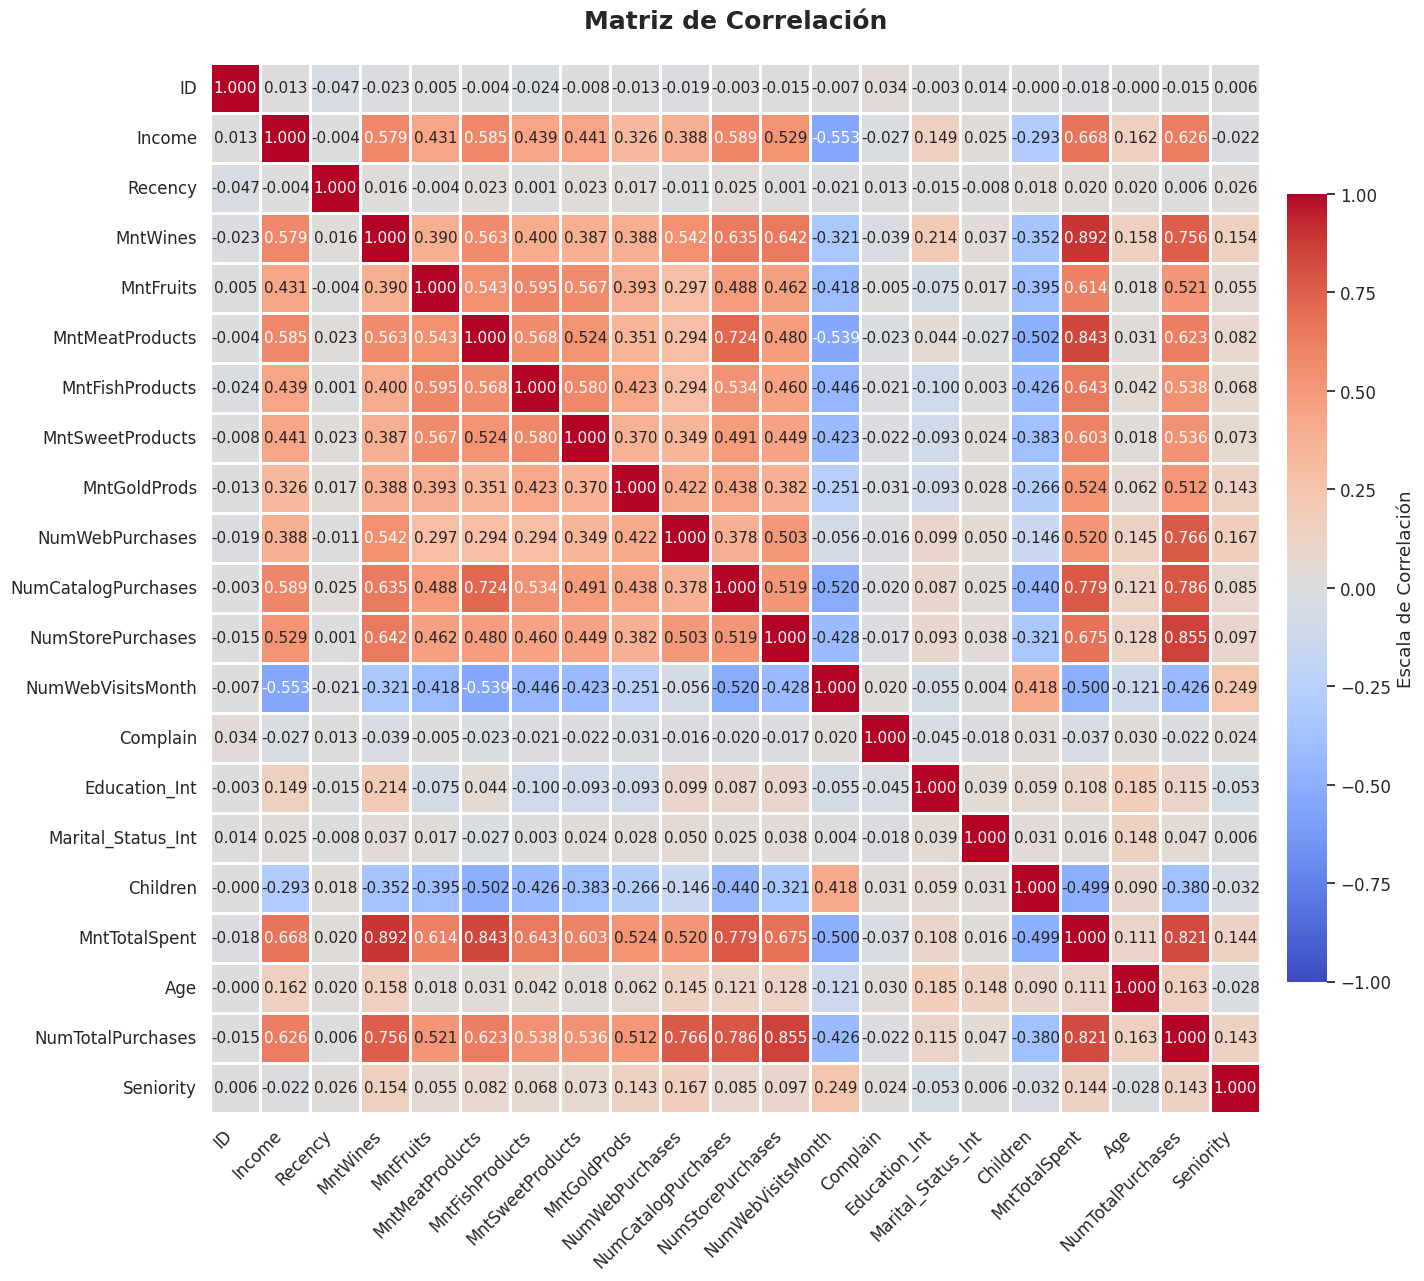

In [ ]:
# Configuración general de estilo
sns.set(style="whitegrid", font_scale=1.1)

# Realizamos la matriz de correlación
correlation_matrix = data.corr(method='pearson')

# Configuración del gráfico con tamaño ampliado
plt.figure(figsize=(18, 14))  # Tamaño aumentado

# Mapa de calor con ajustes mejorados
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',  # Mostrar 3 decimales (reducido para mejor legibilidad)
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.8,  # Líneas más gruesas
    linecolor='white',  # Líneas blancas para mejor contraste
    square=True,  # Para que las celdas sean cuadradas
    annot_kws={'size': 11},  # Tamaño de fuente aumentado
    cbar_kws={
        'shrink': 0.75,
        'aspect': 20,
        'label': 'Escala de Correlación',
        'pad': 0.02
    }
)

# Ajustes de título y etiquetas
plt.title('Matriz de Correlación', pad=25, fontsize=18, fontweight='bold')
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=12
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=12
)

# Ajustar espacio entre celdas
plt.tight_layout(pad=2.0)  # Espacio adicional alrededor del gráfico

# Añadir margen blanco alrededor del heatmap
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)

plt.show()

**13**. ¿Que información sobre la relación entre las variables que componen el dataset nos proporciona la matriz de correlación? Describe qué es una matriz de correlación y para qué sirve.

**Respuesta:**

- La matriz de correlacion, nos ayuda a validar que tanto un dato influye sobre otro. Los valores de influencia va de -1 a 1, y entre mas alejado del 0 se encuentre el valor, mas es la influencia.
  
  En caso de que el valor de la correlacion sea positivo, indicara que a medida que un dato sube el otro sube. En caso de ser negativo, a medida que un dato aumente el otro disminuira.


**14**. Analiza los resultados de la matriz de correlación. Para llevar a cabo este análisis podéis plantearos preguntas cómo :¿Existe una relación fuerte entre variables? ¿Qué variables son estas? ¿Qué repercusión tiene para el análisis que las variables tengan una elevada correlación positiva/negativa?...


**Respuesta:**

- MntTotalSpent tiene una fuerte correlacion con Mnt Wines, lo que podria indicar que existe gran parte de las compras incluyen vinos (0,89)

- La gente que compra en tienda, web y catalogo, influyen directamente al numero total de compras.

- Existe una relacion negativa entre la frecuencia de visitas a la pagina web con el total de ventas (totalSpent) en un -0,5 lo que podria indicar que la gente visita la pagina pero no realiza compras, sin embargo se observa que este mismo publico tiene una ligera relacion con children en un 0,418 pudiendo indicar que el numero de visitas en la web aumenta en el publico de padres.

### Paso 5. Análisis de outliers

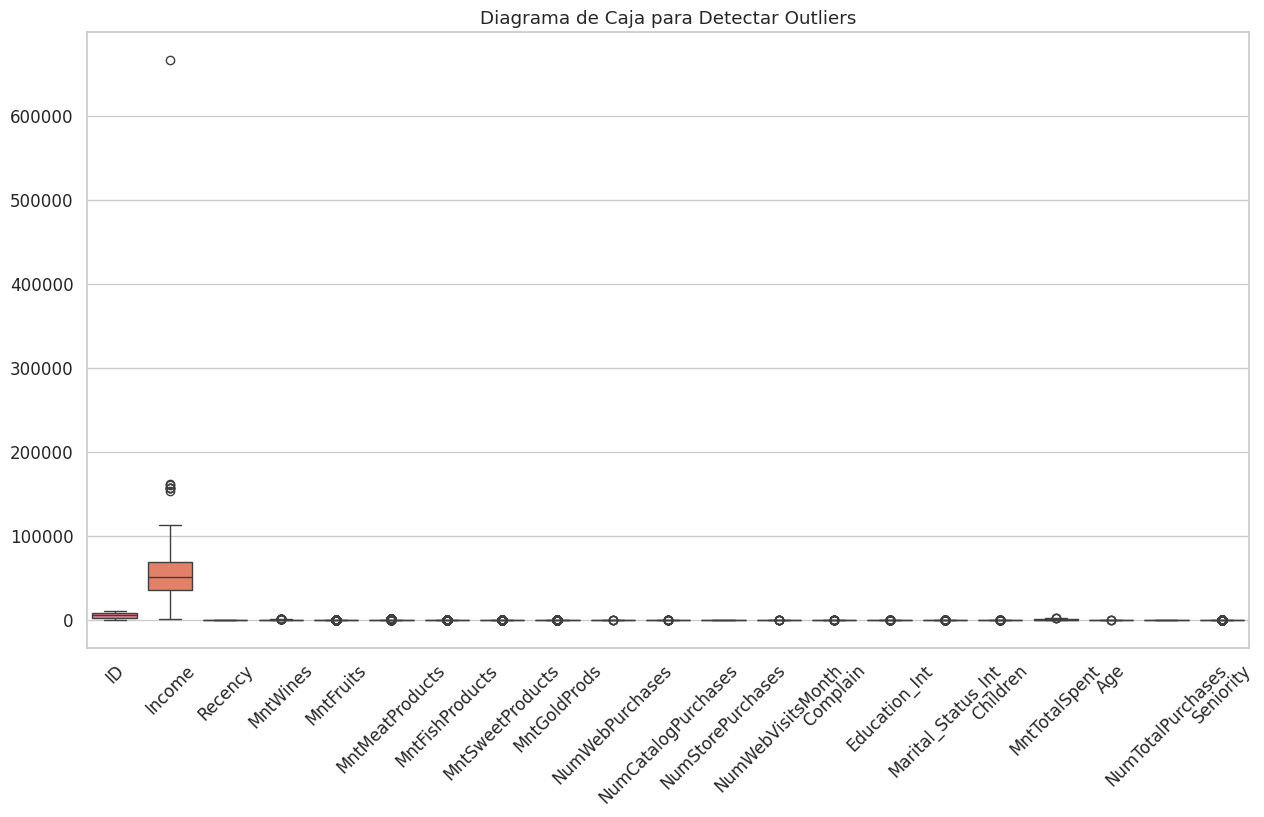

In [ ]:
# Visualizamos los outliers en cada una de las variables utilizando un boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.title('Diagrama de Caja para Detectar Outliers')
plt.show()

**15**. ¿Existen variables que contengan outliers? Indicad cuales. * Si necesitáis verlas en mayor profundidad podéis generar un nuevo bloxpot de la variable en concreto*

**Respuesta:**

- El diagrama de caja y bigote nos indica si existen valores atipicos mediante la representacion de burbujas. En este grafico, se observan por en Income, sin embargo a simple vista el resto de graficos No. Por lo que se decide elaborar un nuevo grafico ignorando esta variable.

- Income, cuenta con un valor atpico muy extremo.

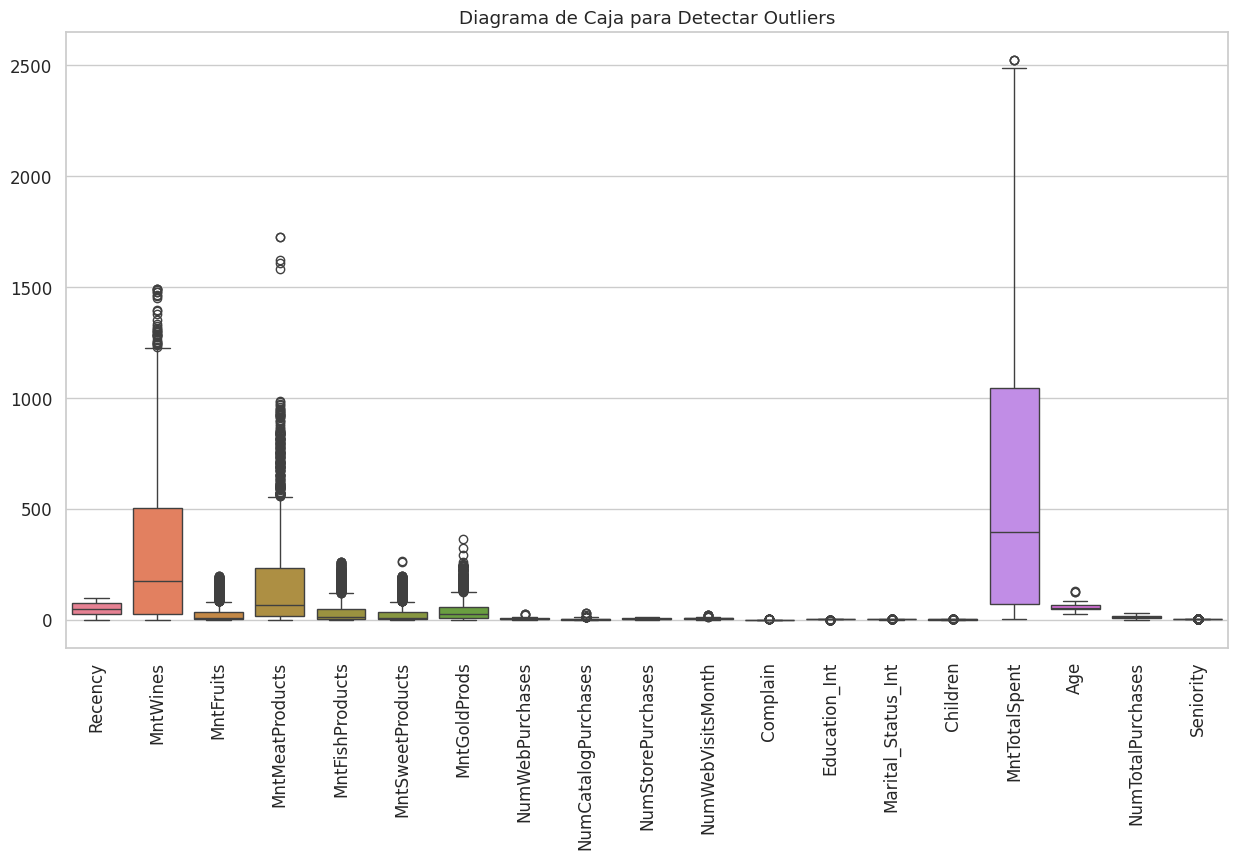

In [ ]:
# Visualizamos los outliers (excluyendo Income e ID) con rótulos verticales
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(['Income', 'ID'], axis=1))
plt.xticks(rotation=90)  # Cambiado de 45° a 90° para orientación vertical
plt.title('Diagrama de Caja para Detectar Outliers')
plt.show()

**15** Parte 2. ¿Existen variables que contengan outliers? Indicad cuales. * Si necesitáis verlas en mayor profundidad podéis generar un nuevo bloxpot de la variable en concreto*

- Se observan multiplex datos atipicos en las variables.

  MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, MntTotalSpent

- Se procede a retir en un futuro grafico para terminar de analizar el resto de variables.

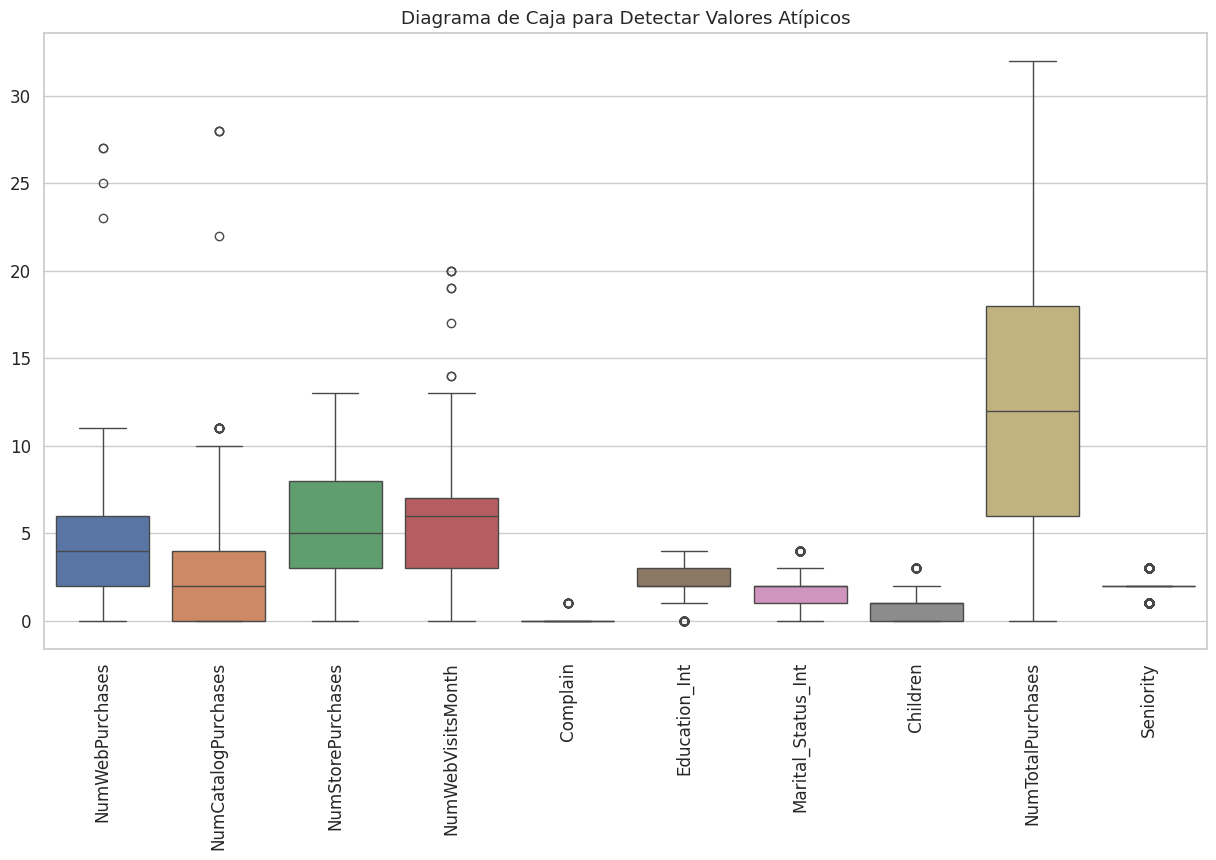

In [ ]:
# Visualizamos los valores atípicos excluyendo las variables especificadas
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop([
    'ID',
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'MntTotalSpent',
    'Age'
], axis=1))
plt.xticks(rotation=90)  # Rotación vertical para mejor lectura
plt.title('Diagrama de Caja para Detectar Valores Atípicos')
plt.show()

**15**. Parte 3 ¿Existen variables que contengan outliers? Indicad cuales. * Si necesitáis verlas en mayor profundidad podéis generar un nuevo bloxpot de la variable en concreto*

- A pesar de que existen variables con datos atipicos, estos representan una cantidad muy minima dentro de la data, por lo que estas muy problablemente no representan un ruido significativo

Resumen Resultado 15, existen pocos datos atipicos en los datos otorgados en el grafico de la parte 3. en el grafico de la parte 2, los productos que van desde mntwines a mntgoldproducts cuentan con una gran cantidad de datos atipicos, por lo que sugiere que una minoria de clientes tienden a tener un gasto mayor sobre estos bienes.

**16**. En la celda que se encuentra a continuación, escribid el código necesario para generar las estadísticas de las variables que contengan outliers.

In [ ]:
#Generamos estadísticas de las variables que continen outliers
import pandas as pd
import numpy as np

# Función mejorada para formateo europeo
def formato_europeo(x, decimales=2):
    try:
        x_float = float(x)
        if x_float.is_integer():
            return f"{int(x_float):,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
        return f"{x_float:,.{decimales}f}".replace(",", "X").replace(".", ",").replace("X", ".")
    except:
        return str(x)

# Función para detectar columnas con outliers
def detectar_columnas_con_outliers(df, umbral=1.5):
    cols_numericas = df.select_dtypes(include=[np.number]).columns
    columnas_con_outliers = []

    for col in cols_numericas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        if iqr > 0:  # Ignorar columnas sin dispersión
            limite_sup = q3 + umbral * iqr
            limite_inf = q1 - umbral * iqr
            if df[col].gt(limite_sup).any() or df[col].lt(limite_inf).any():
                columnas_con_outliers.append(col)

    return columnas_con_outliers

# --- Proceso principal ---
# 1. Detectar variables con outliers
variables_atipicas = detectar_columnas_con_outliers(data)

# 2. Generar estadísticas descriptivas (solo para esas variables)
if variables_atipicas:
    stats = data[variables_atipicas].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

    # Aplicar formato europeo (versión compatible con pandas 2.0+)
    stats_formateadas = stats.apply(lambda s: s.map(lambda x: formato_europeo(x)))

    print("\n📊 Estadísticas descriptivas:")
    display(stats_formateadas)
else:
    print("No se detectaron variables con outliers.")


📊 Estadísticas descriptivas:


,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age
count,2.216,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240,2.240
mean,"52.247,25","303,94","26,30","166,95","37,53","27,06","44,02","4,08","2,66","5,32","2,46","1,48","0,95","605,80","54,19"
std,"25.173,08","336,60","39,77","225,72","54,63","41,28","52,17","2,78","2,92","2,43","1,00","1,05","0,75","602,25","11,98"
min,1.730,0,0,0,0,0,0,0,0,0,0,0,0,5,27
1%,"7.579,20",1,0,2,0,0,0,0,0,1,0,0,0,13,31
5%,"18.985,50",3,0,4,0,0,1,1,0,1,1,0,0,22,35
25%,35.303,"23,75",1,16,3,1,9,2,0,3,2,1,0,"68,75",46
50%,"51.381,50","173,50",8,67,12,8,24,4,2,6,2,2,1,396,53
75%,68.522,"504,25",33,232,50,33,56,6,4,7,3,2,1,"1.045,50",64
95%,84.130,1.000,123,"687,10","168,05",126,"165,05",9,9,8,4,3,2,"1.772,30",73


**17**. ¿Qué repercusión tiene para el análisis la existencia de outliers en dichas variables?

**RESUESTA:**

- los valores atipicos pueden generar una media completamente distorcionada y generar un idea falsa.

- Puede generar sobre estimaciones en el analisis de datos.

Que hacer en estos casos:

- Un metodo seria el uso de la mediana o los percentiles como valores de referencia en lugar de la media.


### Paso 5.  Análisis de variables de interés: Conocimiento de cliente


Una vez visto cómo están distribuidos los datos, si existen valores faltantes y anómalos y llevado a cabo las limpiezas y tranformaciones necesarias,  haremos un análisis en mayor profundidad de aquellas variables que consideramos que nos proporcionan información relevante sobre el comportamiento y las características de nuestros clientes . Esta información puede ser:  el gasto en función de su edad, el tipo de canal de venta que más utilizan o el nivel educativo de aquellos que compran un determinado tipo de producto.

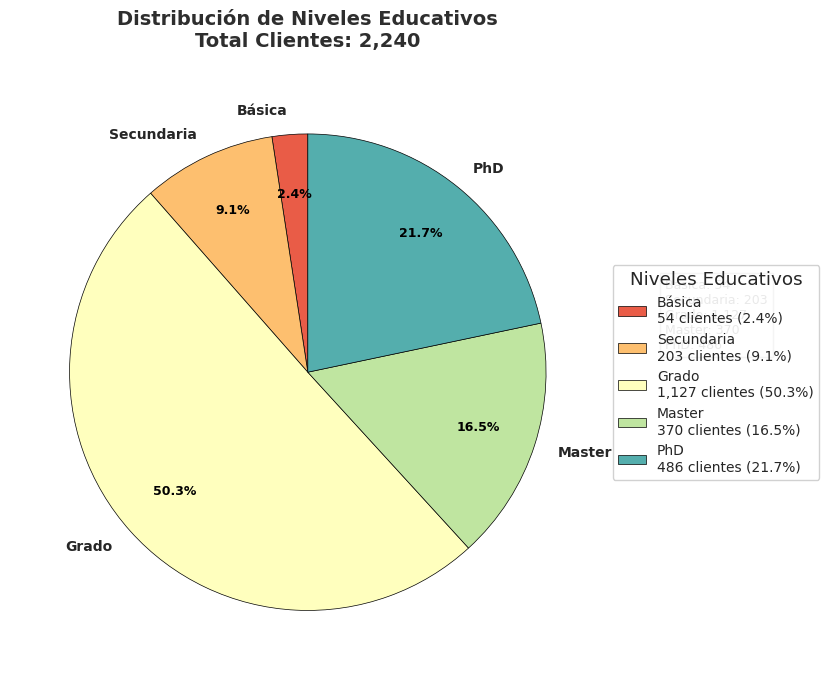

In [ ]:
# Analizamos el nivel educativo de los clientes. Para hacerlo visualizamos con un gráfico de torta

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Mapeo dinámico de categorías (extensible)
mapeo_educacion = {
    0: 'Básica',
    1: 'Secundaria',
    2: 'Grado',
    3: 'Master',
    4: 'PhD'
    # ¡Nuevas categorías se añaden aquí!
}

# 2. Procesamiento inteligente de datos
counts = data['Education_Int'].value_counts().sort_index()  # Ordenamos por código numérico

# Generación automática de etiquetas
labels = [mapeo_educacion.get(idx, f'Código {idx}') for idx in counts.index]
valores = counts.values
porcentajes = valores / valores.sum() * 100

# 3. Configuración del gráfico auto-adaptable
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

# Paleta de colores profesional (se ajusta al número de categorías)
colores = sns.color_palette("Spectral", n_colors=len(labels))

wedges, texts, autotexts = ax.pie(
    valores,
    labels=labels,
    colors=colores,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Mejorar visualización de porcentajes
plt.setp(autotexts, color='black', fontsize=9)

# 5. Título y leyenda automática con estadísticas
ax.set_title(
    f'Distribución de Niveles Educativos\nTotal Clientes: {sum(valores):,}',
    fontsize=14,
    pad=20,
    fontweight='bold',
    color='#2e2e2e'
)

# Leyenda profesional con conteo exacto
leyenda = [
    f'{label}\n{val:,} clientes ({porc:.1f}%)'
    for label, val, porc in zip(labels, valores, porcentajes)
]

ax.legend(
    wedges,
    leyenda,
    title="Niveles Educativos",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    framealpha=0.9,
    fontsize=10
)

# 6. Cuadro informativo adicional (opcional)
info_text = "\n".join([f"{label}: {val:,}" for label, val in zip(labels, valores)])
ax.text(
    1.5, 0.1,
    info_text,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
    fontsize=9
)

plt.tight_layout()
plt.show()

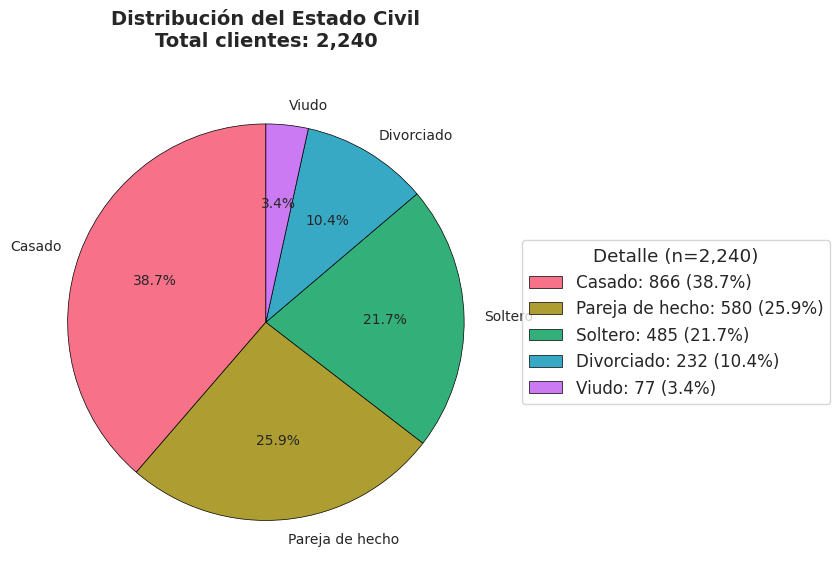

In [ ]:
# Analizamos el estado civil de los clientes. Para hacerlo visualizamos con un gráfico de torta

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mapeo dinámico de categorías (extensible)
mapeo_estados = {
    0: 'Soltero',
    1: 'Pareja de hecho',
    2: 'Casado',
    3: 'Divorciado',
    4: 'Viudo'
    # ¡Se pueden añadir nuevas categorías aquí automáticamente!
}

# 2. Procesamiento inteligente de datos
counts = data['Marital_Status_Int'].value_counts()

# Auto-generación de etiquetas (usa el mapeo o conserva el valor numérico si no existe)
labels = [mapeo_estados.get(idx, str(idx)) for idx in counts.index]
valores = counts.values

# 3. Configuración del gráfico auto-adaptable
plt.figure(figsize=(10, 6))
plt.pie(
    valores,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=sns.color_palette("husl", n_colors=len(valores)),  # Colores dinámicos
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10}
)

# 4. Título con información dinámica
plt.title(
    f'Distribución del Estado Civil\nTotal clientes: {sum(valores):,}',
    fontsize=14,
    pad=20,
    fontweight='bold'
)

# 5. Leyenda automática con conteos exactos
plt.legend(
    title=f"Detalle (n={sum(valores):,})",
    labels=[f"{label}: {val:,} ({val/sum(valores):.1%})" for label, val in zip(labels, valores)],
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

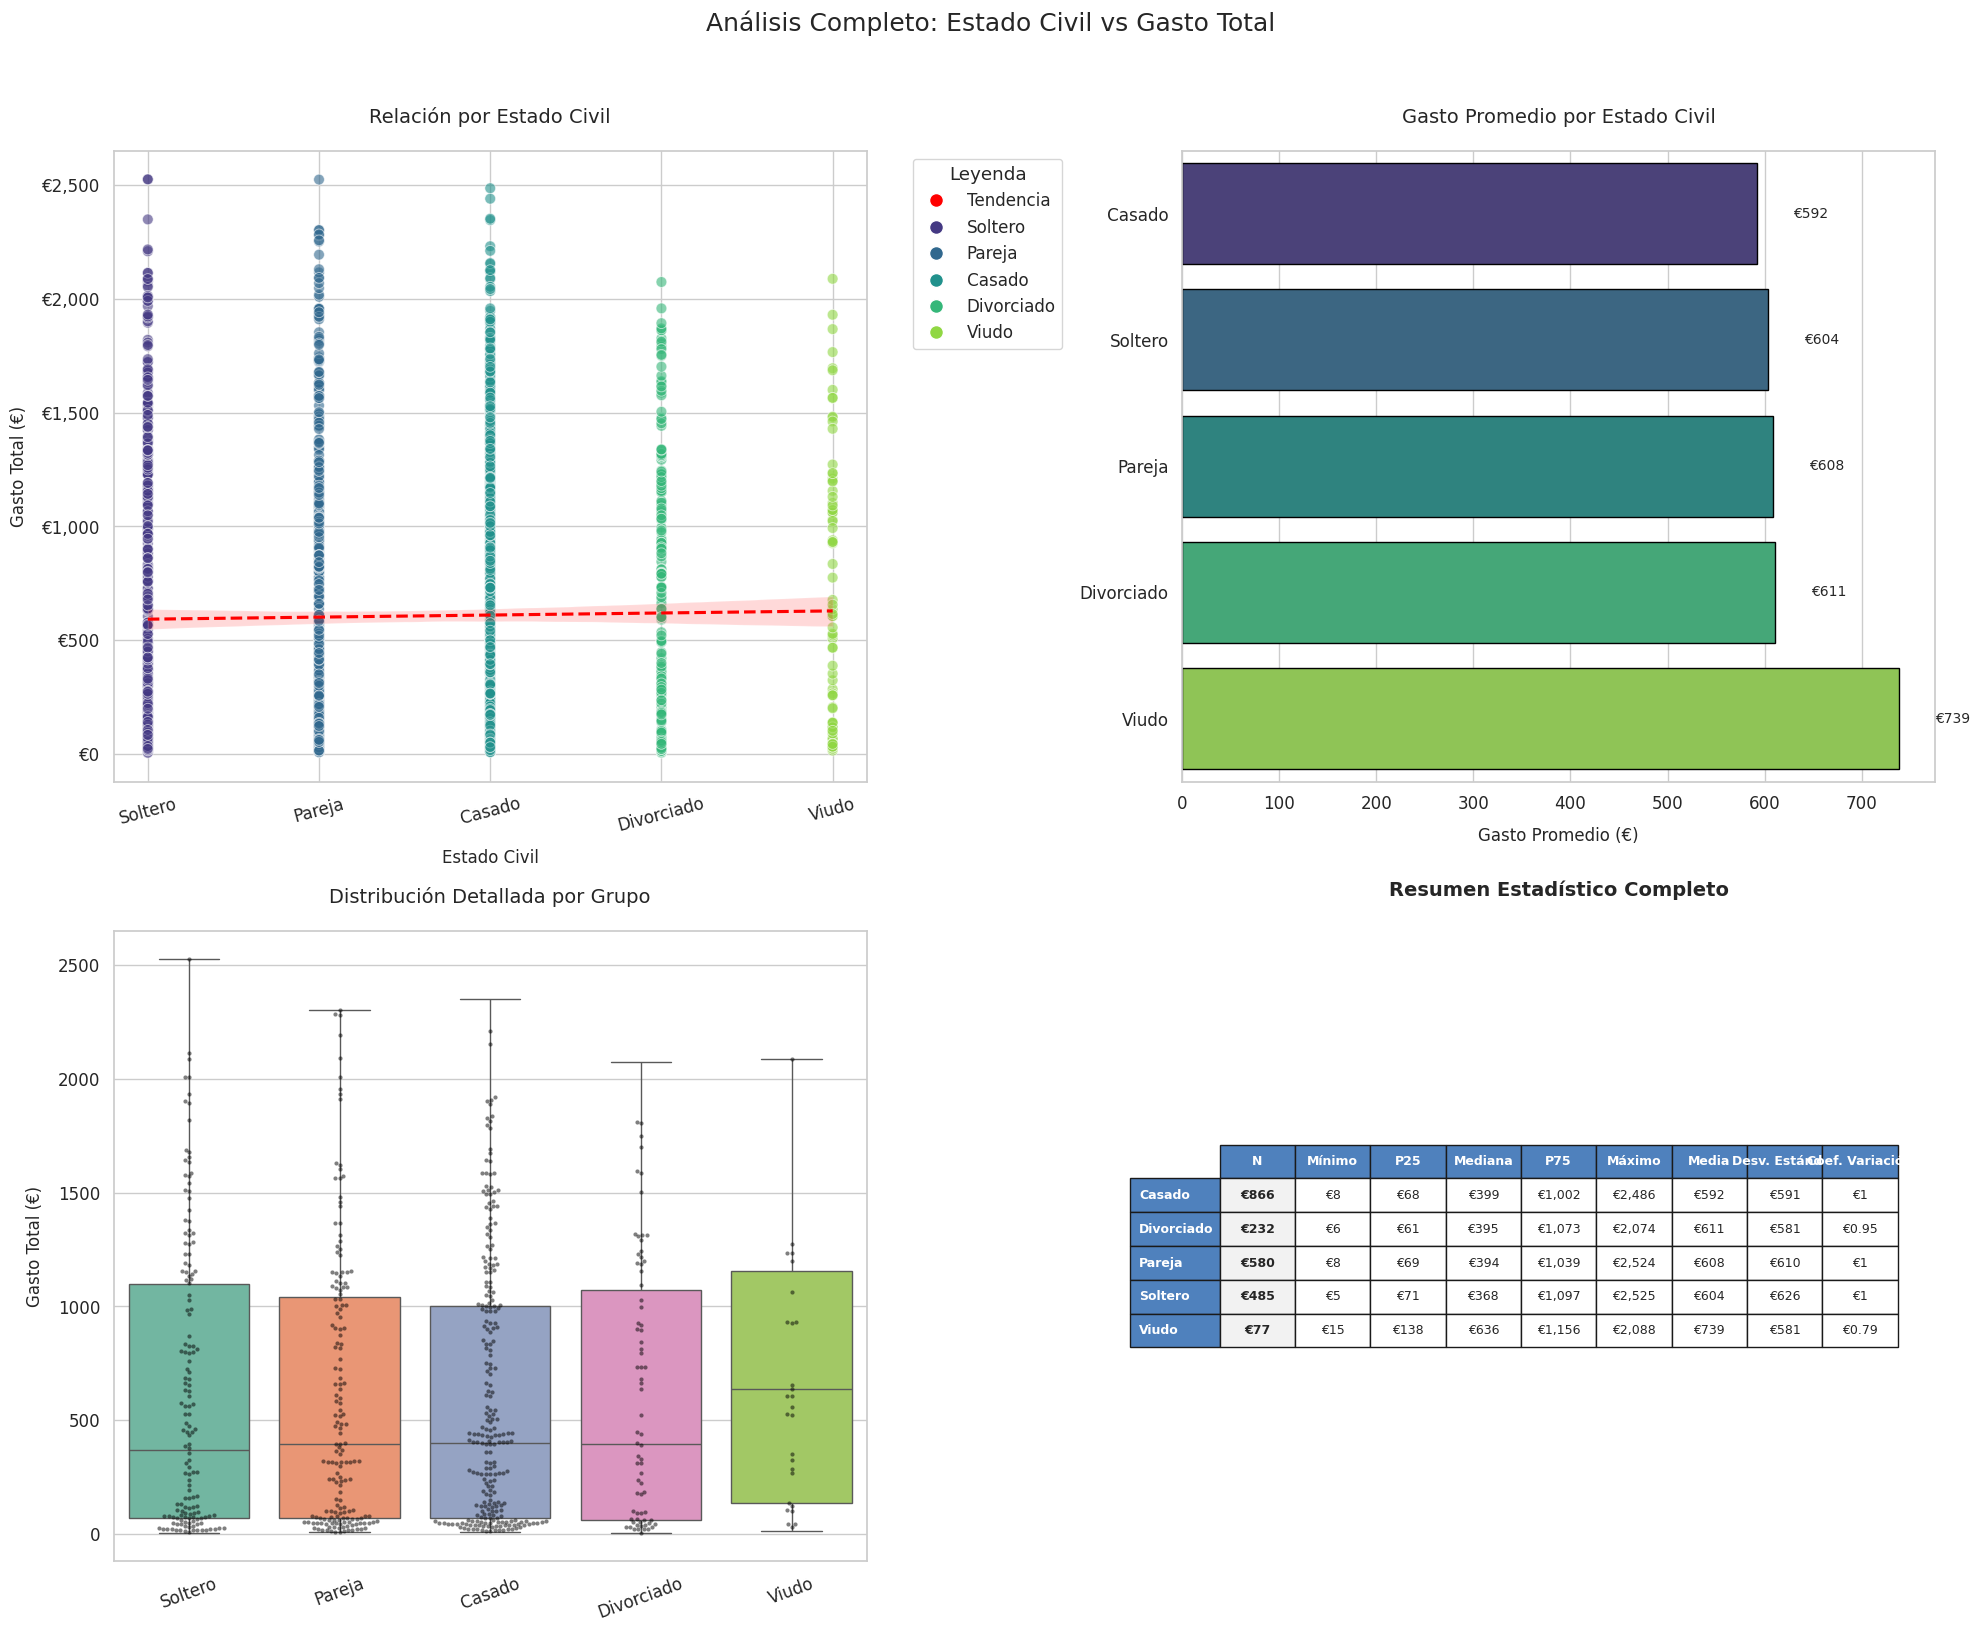

In [ ]:
#Analizamos la relación entre el estado civil del cliente y el gasto y lo representamos gráficamente.

# Configuración de estilo profesional
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelpad'] = 10

# 1. Preparación de datos
data['Estado_Civil'] = data['Marital_Status_Int'].map({
    0: 'Soltero',
    1: 'Pareja',
    2: 'Casado',
    3: 'Divorciado',
    4: 'Viudo'
}).fillna('Otro')

# 2. Crear figura compuesta
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # Tamaño aumentado
fig.suptitle('Análisis Completo: Estado Civil vs Gasto Total', fontsize=18, y=1.02)

# -----------------------------------
# Gráfico 1: Dispersión con regresión (VERSIÓN FINAL)
# -----------------------------------
# 1. Configuración de categorías
categorias_reales = data['Estado_Civil'].unique().tolist()
num_categorias = len(categorias_reales)

# 2. Scatterplot con colores por categoría
scatter = sns.scatterplot(
    x='Estado_Civil',
    y='MntTotalSpent',
    hue='Estado_Civil',
    data=data,
    ax=axes[0, 0],
    palette="viridis",
    alpha=0.6,
    s=60,
    legend=False  # Desactivamos leyenda temporalmente
)

# 3. Línea de tendencia (usando códigos numéricos)
sns.regplot(
    x=pd.Categorical(data['Estado_Civil'], categories=categorias_reales).codes,
    y='MntTotalSpent',
    data=data,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'label': 'Tendencia'},
    ax=axes[0, 0]
)

# 4. Configuración de ejes
axes[0, 0].set_xticks(range(num_categorias))
axes[0, 0].set_xticklabels(categorias_reales, rotation=15)
axes[0, 0].set(
    xlabel='Estado Civil',
    ylabel='Gasto Total (€)',
    title='Relación por Estado Civil'
)
axes[0, 0].yaxis.set_major_formatter('€{x:,.0f}')

# 5. Leyenda personalizada (solo si hay elementos)
if len(scatter.collections) > 0:  # Verifica que haya puntos en el gráfico
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Tendencia'),
        *[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=cat)
          for cat, color in zip(categorias_reales, sns.color_palette("viridis", num_categorias))]
    ]
    axes[0, 0].legend(
        handles=handles,
        title='Leyenda',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
# -----------------------------------
# Gráfico 2: Diagrama de Barras (Promedio)
# -----------------------------------
avg_spent = data.groupby('Estado_Civil')['MntTotalSpent'].mean().sort_values()
sns.barplot(
    x=avg_spent.values,
    y=avg_spent.index,
    hue=avg_spent.index,
    palette="viridis",
    ax=axes[0, 1],
    legend=False,
    edgecolor='black'
)
axes[0, 1].set(xlabel='Gasto Promedio (€)', ylabel='',
              title='Gasto Promedio por Estado Civil')

# Etiquetas de valor
for i, v in enumerate(avg_spent):
    axes[0, 1].text(v + max(avg_spent)*0.05, i,
                   f"€{v:,.0f}",
                   va='center', fontsize=10)

# -----------------------------------
# Gráfico 3: Boxplot + Swarmplot
# -----------------------------------
sns.boxplot(
    x='Estado_Civil',
    y='MntTotalSpent',
    hue='Estado_Civil',
    data=data,
    palette="Set2",
    ax=axes[1, 0],
    showfliers=False,
    legend=False
)
sns.swarmplot(
    x='Estado_Civil',
    y='MntTotalSpent',
    data=data.sample(frac=0.3, random_state=42),
    ax=axes[1, 0],
    color='black',
    alpha=0.5,
    size=3
)
axes[1, 0].set(xlabel='', ylabel='Gasto Total (€)',
              title='Distribución Detallada por Grupo')
axes[1, 0].tick_params(axis='x', rotation=20)

# -----------------------------------
# Gráfico 4: Resumen Estadístico COMPLETO
# -----------------------------------
# Función de formateo
def formatear_valor(valor):
    if isinstance(valor, (int, float)):
        return f"€{valor:,.0f}" if valor >= 1 else f"€{valor:.2f}"
    return str(valor)

# Calculamos TODAS las estadísticas
stats = data.groupby('Estado_Civil')['MntTotalSpent'].agg([
    ('N', 'count'),
    ('Mínimo', 'min'),
    ('P25', lambda x: np.percentile(x, 25)),
    ('Mediana', 'median'),
    ('P75', lambda x: np.percentile(x, 75)),
    ('Máximo', 'max'),
    ('Media', 'mean'),
    ('Desv. Estándar', 'std'),
    ('Coef. Variación', lambda x: round(x.std()/x.mean(), 2))
]).apply(lambda col: col.map(formatear_valor))

# Configuración de tabla
axes[1, 1].axis('off')
table = axes[1, 1].table(
    cellText=stats.values,
    rowLabels=stats.index,
    colLabels=stats.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.1]*len(stats.columns)
)

# Estilo profesional para la tabla
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.8)  # Más espacio vertical

# Destacar cabeceras y totales
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == -1:  # Cabeceras
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4F81BD')
    elif j == 0:  # Primera columna (nombres)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#F2F2F2')

axes[1, 1].set_title('Resumen Estadístico Completo', pad=25, fontsize=14, fontweight='bold')

# -----------------------------------
# Ajustes finales
# -----------------------------------
plt.tight_layout()

# Guardar en alta calidad
plt.savefig('analisis_completo.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

<ipython-input-49-a6d13bc21432>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Children', y = 'MntTotalSpent', data = data, palette = 'cool')


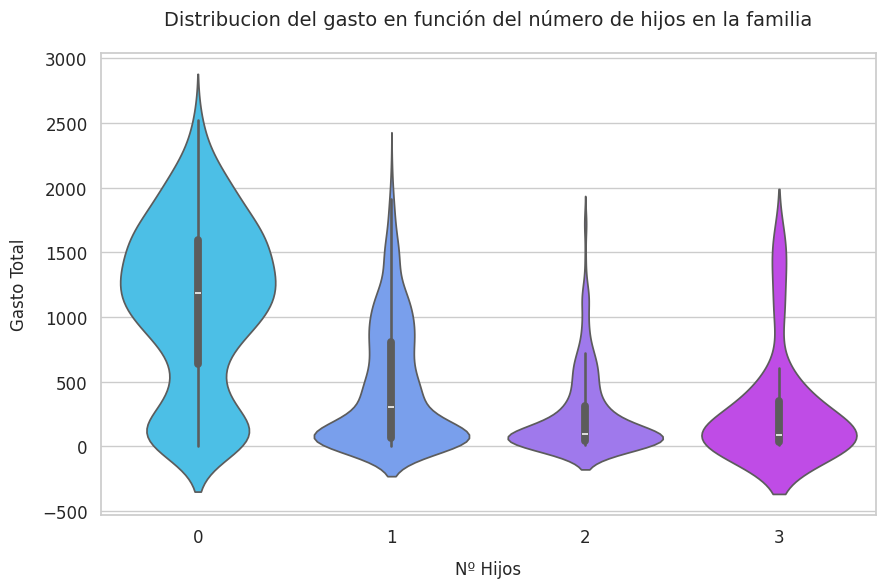

In [ ]:
# Analizamos la relación entre el número de hijos y el gasto total. Visulizamos con un gráfico de caja

# Seleccionamos el tamaño de la figura
plt.figure(figsize = (10, 6))

# Creamos el dibujo de violin
sns.violinplot(x = 'Children', y = 'MntTotalSpent', data = data, palette = 'cool')

# Definimos el titulo de la figura y de cada eje
plt.title('Distribucion del gasto en función del número de hijos en la familia')
plt.xlabel('Nº Hijos')
plt.ylabel('Gasto Total')

plt.show()

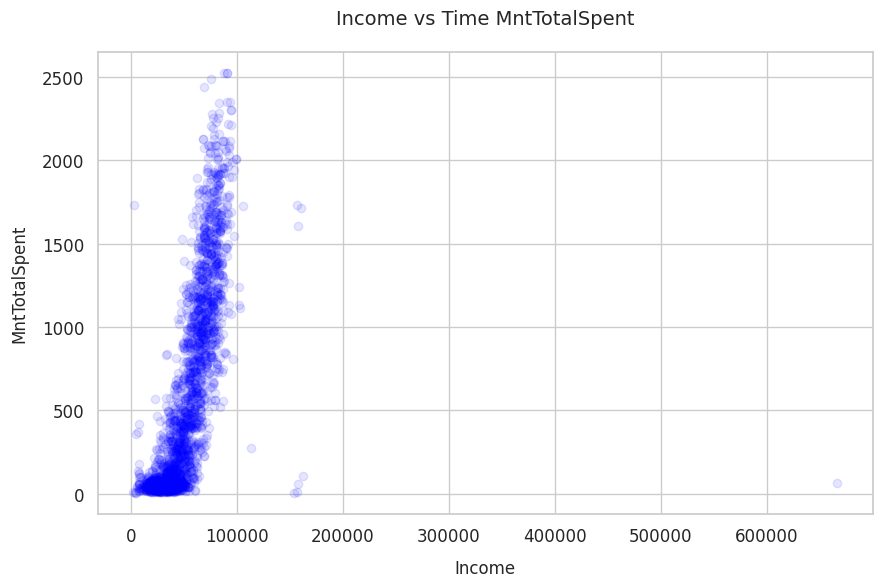

In [ ]:
# Analizamos la relación entre los ingresos de la unidad familiar (Income) y el gasto (MntTotalSpent). Visualizamos con un diagrama de dispersión

# Definimos el tamaño de la figura
plt.figure(figsize = (10, 6))

# Creamos la visualizacion, de tipo scatter plot
plt.scatter(data['Income'], data['MntTotalSpent'], color = 'blue', alpha = 0.1)

# Definimos la leyenda del gráfico
plt.xlabel('Income')
plt.ylabel('MntTotalSpent')

# Definimos el título del gráfico
plt.title('Income vs Time MntTotalSpent')
plt.show()

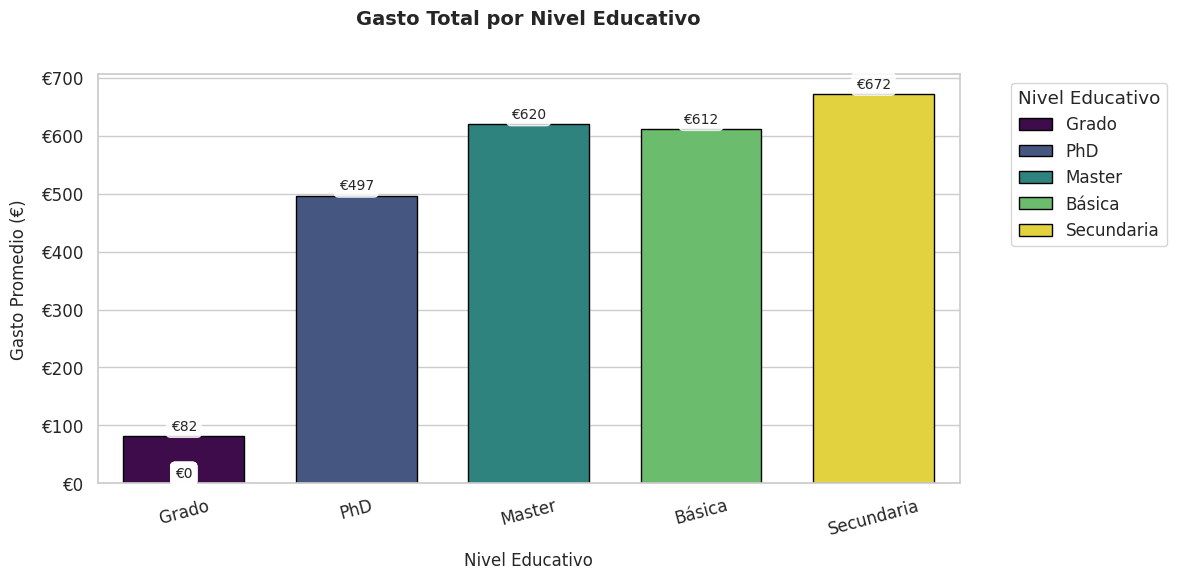

In [ ]:
#Analizamos la relación entre el nivel educativo del cliente y el gasto

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de estilo profesional
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelpad': 10
})

# 1. Datos y categorías (completamente automático)
categorias = data['Education_Int'].unique()
num_categorias = len(categorias)

# 2. Figura mejorada
plt.figure(figsize=(12, 6))

# 3. Gráfico de barras profesional con auto-leyenda
barplot = sns.barplot(
    x='Education_Int',
    y='MntTotalSpent',
    data=data,
    hue='Education_Int' if num_categorias <= 10 else None,  # Leyenda condicional
    palette='viridis',
    estimator=np.mean,
    errorbar=None,
    edgecolor='black',
    width=0.7,
    dodge=False
)

# 4. Personalización automática de ejes
plt.title('Gasto Total por Nivel Educativo\n', fontweight='bold')
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Gasto Promedio (€)', fontsize=12)
barplot.yaxis.set_major_formatter('€{x:,.0f}')

# 5. Sistema de etiquetas inteligente (2 opciones)
# Opción A: Etiquetas genéricas automáticas (comentado)
# labels = [f'Nivel {int(cat)}' for cat in categorias]

# Opción B: Mapeo parcial con respaldo automático (recomendado)
mapeo_parcial = {
    0: 'Básica',
    1: 'Secundaria',
    2: 'Grado',
    3: 'Master',
    4: 'PhD'
}
labels = [mapeo_parcial.get(int(cat), f'Código {int(cat)}') for cat in categorias]

plt.xticks(ticks=range(num_categorias), labels=labels, rotation=15)

# 6. Valores exactos sobre barras (automático para cualquier categoría)
for p in barplot.patches:
    barplot.annotate(
        f'€{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 7),
        textcoords='offset points',
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8)
    )

# 7. Leyenda condicional (sólo si hay pocas categorías)
if num_categorias <= 10:
    handles, _ = barplot.get_legend_handles_labels()
    plt.legend(
        handles,
        labels,
        title='Nivel Educativo',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        frameon=True
    )

# 8. Ajustes finales
plt.tight_layout()

# Guardar en alta calidad (opcional)
plt.savefig(
    'gasto_por_educacion_auto.png',
    dpi=300,
    bbox_inches='tight',
    facecolor='white'
)
plt.show()

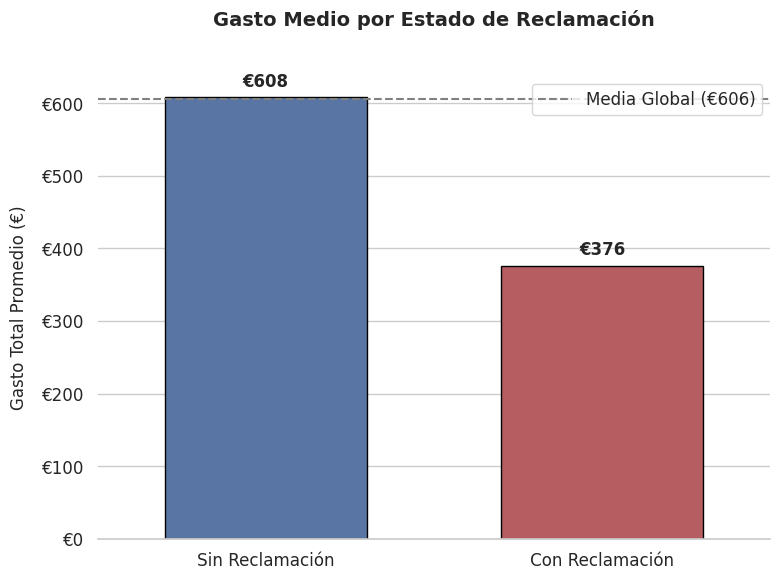

In [ ]:
#Analizamos la relación entre el gasto y el las quejas planteadas por el cliente.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración profesional
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelpad': 10
})

# 1. Cálculo CONSISTENTE del promedio (agrupado)
avg_data = data.groupby('Complain', as_index=False)['MntTotalSpent'].mean()
avg_data['Reclamacion'] = avg_data['Complain'].map({0: 'Sin Reclamación', 1: 'Con Reclamación'})

# 2. Figura con tamaño óptimo
plt.figure(figsize=(8, 6))

# 3. Gráfico de barras PRECISO
ax = sns.barplot(
    x='Reclamacion',
    y='MntTotalSpent',
    data=avg_data,  # Usamos los datos ya calculados
    hue='Reclamacion',
    palette=['#4c72b0', '#c44e52'],
    edgecolor='black',
    width=0.6,
    estimator=np.mean,  # Explicitamos el cálculo
    errorbar=None,      # Sin barras de error
    legend=False
)

# 4. Personalización (igual que antes)
plt.title('Gasto Medio por Estado de Reclamación\n', fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Gasto Total Promedio (€)')
ax.yaxis.set_major_formatter('€{x:,.0f}')

# 5. Valores exactos (de los datos precalculados)
for i, row in avg_data.iterrows():
    ax.text(i, row['MntTotalSpent']+10, f'€{row["MntTotalSpent"]:,.0f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# 6. Línea de media global (calculada de los mismos datos)
media_global = data['MntTotalSpent'].mean()
ax.axhline(media_global, color='gray', linestyle='--', linewidth=1.5,
           label=f'Media Global (€{media_global:,.0f})')

# 7. Ajustes finales
ax.legend(loc='upper right')
sns.despine(left=True)
plt.tight_layout()
plt.show()

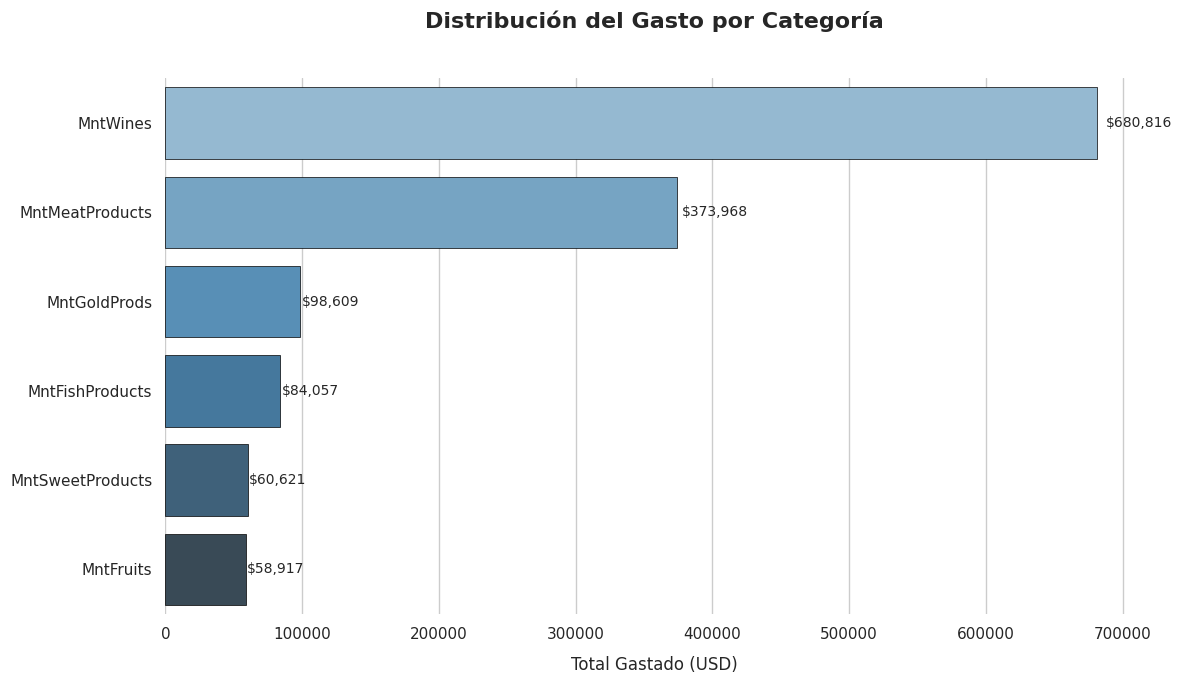

In [ ]:
# Analizamos las ventas por tipo de producto. Lo visualizamos con un gráfico de barras

# --- 1. Cálculo excluyendo 'MntTotalSpent' ---
columnas_mnt = [col for col in data.columns if col.startswith('Mnt') and col != 'MntTotalSpent']
df_suma = data[columnas_mnt].sum().reset_index()
df_suma.columns = ['Producto', 'Total_Gastado']
df_suma = df_suma.sort_values('Total_Gastado', ascending=False)

# --- 2. Visualización actualizada ---
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Gráfico de barras (versión compatible con futuras actualizaciones)
ax = sns.barplot(
    data=df_suma,
    x='Total_Gastado',
    y='Producto',
    hue='Producto',      # Nueva variable requerida
    palette="Blues_d",
    edgecolor="black",
    linewidth=0.5,
    legend=False         # Evita mostrar leyenda redundante
)

# Personalización
plt.title('Distribución del Gasto por Categoría\n',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Total Gastado (USD)', fontsize=12)
plt.ylabel('')
plt.xticks(rotation=0)

# Etiquetas de valor
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + width*0.01,
        p.get_y() + p.get_height()/2,
        f'${width:,.0f}',
        ha='left',
        va='center',
        fontsize=10
    )

# Ajustes finales
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

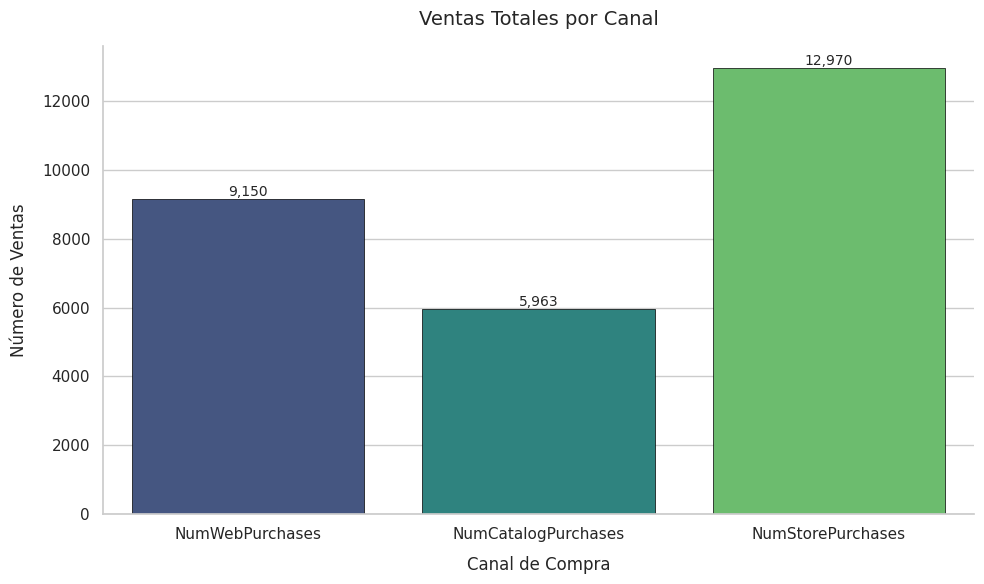

In [ ]:
# Analizamos las ventas por canal. Lo visualizamos con un gráfico de barras

# --- 1. Cálculo directo ---
columnas_compras = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_suma = data[columnas_compras].sum().reset_index()
df_suma.columns = ['Canal', 'Total_Ventas']

# --- 2. Visualización clara ---
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Gráfico de barras
ax = sns.barplot(
    data=df_suma,
    x='Canal',
    y='Total_Ventas',
    hue='Canal',          # Para evitar warnings
    palette="viridis",    # Paleta alternativa
    edgecolor="black",
    linewidth=0.5,
    legend=False,         # Sin leyenda
    order=columnas_compras  # Mantener orden original
)

# Personalización
plt.title('Ventas Totales por Canal', fontsize=14, pad=15)
plt.xlabel('Canal de Compra', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)

# Añadir valores
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

# Ajustes finales
sns.despine()
plt.tight_layout()
plt.show()

**18**. Realiza los análisis o comparativas de al menos dos variables que consideréis que pueden enriquecer el el análisis y ser útiles para el planteamiento de nuevas estrategias comerciales en el ámbito de las 4P

**RESPUESTA:**

-

### Paso 6:  Informe de resultados y conclusiones

**19**. Elaborad un informe que contenga una descripción del **análisis de los datos** que habéis realizado. Este informe debe contener como mínimo los siguientes aspectos:

- Descripción de la tipología de cliente (edad, estado civil,número de hijos...)
- Descripción del comportamiento del cliente (productos que compran, canales de venta que utilizan)
- Detalle de los resultados o conclusiones alcanzadas en el análisis.

Para realizar este informe será necesario que analicéis otras variables de interés además de las ya analizadas. Podéis apoyaros para ello en la creación de visualizaciones, son de gran ayuda.

### Paso 7: Propuesta para el lanzamiento de nuevas estrategias comerciales
**20**.  Elaborad una propuesta con al menos 3 recomendaciones para el lanzamiento de nuevas estrategias comerciales en el ámbito del marketing mix y las 4P (producto, precio, distribución y comunicación).
Esta propuesta debe estar basada y justificada en el análisis de los datos disponibles que hemos realizado. **Es importante que baséis vuestras recomendaciones en datos, datos concretos y dentro del dominio del problema que tratamos de resolver**. Esta propuesta debe contener como mínimo los siguientes aspectos:

- Oportunidades comerciales que habéis identificado en base al análisis realizado.
- Recomendaciones de estrategias comerciales en torno a las 4P. Estas pueden estar orientadas por ejemplo a ajustes en la oferta y la demanda, estrategias de precio en función del segmento...etc.